## The Seen and the Unseen
<p>


<p></p>I started my journey in programming by learning C, C++ and for the past two years I've been working with Java. I recently started learning python because of its use and popularity in diverse fields such as web, game development, machine learning, AI, Data Science, etc,. My general approach for learning all these languages was that I would first understand the syntax, take up a problem, understand its requirements, and then try implementing it. It somewhat mimics the steps that are followed in developing a software, where first there is gathering of requirements, analysing, designing and developing of software that meets those requirements. As I went on developing more and more experience I realised that there is more than just meeting the requirements. Refering to Frédéric Bastiat's " <a href = 'http://bastiat.org/en/twisatwins.html'>That Which is Seen, and That Which is Not Seen</a> ", I refer to the concept of writing a program that meets the requirements as the seen aspect of it. However, software development is more than that. A good software is maintainable, ensures correctness and efficiency, is reliable. This is what I call the unseen part of it. Inorder to make the seen better a good amount of time has to be spent on the unseen.
<p>This article focuses on the unseen part of programming. I will first talk about how the different unseen aspects affect the seen. To explain it a bit more further I will use Taylor Series as an example.

### Performance

As a programmer I have written codes that ideally solves a problem. Writing codes involved thinking of some logic and implementing it. The first implementation is called naive implementation. This naive implementation works fine on a single system, for a single user and a limited amount of data. But when this implementation is used in real-time it faces different challenges. It faces a large amount of data and has to deliver the output on time. If the problem uses real-time data then the time taken to generate the output will determine whether the output is valid or up-to-date. All these characteristics determine the performance of a program or a software. An optimized implementation will have reduced computation time and hence better performance. Therefore to reduce computation time a programmer need to take right decisions during implementation. The end user sees the implementation giving the correct result. They do not see all the optimization that is giving them this performance.

### Visualization

Right from school visualization has helped me understand and remember things better rather than just looking at paragraphs and numbers as it must be the case for most of you. Be it flow charts, mind maps, bar graphs or diagrams, visualization helps in understanding and retaining the information in a faster and better way. Similarly data visualization has its own importance in programming. Data Scientist work with huge amount of data and use data visualization to gain insight, understand relations and patterns existing in the data. I used visualization with similar goals - to gain insight on the performance of my function. It made me question the pattern I was seeing and take different decisions regarding optimization of the function. It helped me monitor the function and keep a check for correctness. In the end I could see a faster and more accurate function. All this visualization of data that helped in optimization and testing goes unseen. Visualization helps in understanding other unseen aspects which inturn helps in making the seen better. 

  

### Testing

After writing a program I would usually test it for a few cases to check whether it gives the right output but that doesn't capture all the corner cases. As I want to make my program better I would be making changes regarding its performance. While I am doing this I need to ensure that these changes are not introducing any bugs in the implementation. Testing helps in ensuring that. The user sees the correct output, what they do not see is the steps taken to ensure that the program gives the correct output.

To test my functions I need a reference output, for which there exists library functions. Instead of writing a different testing function for each of them I will make a generic testing function and call it <i>theSeenAndTheUnseenTest()</i>. Each function has its own set of test cases, the trigonometric function will have different angles, the geometric series will have values between $0$ and $1$, the exponential function will have some different values. Therefore <i>theSeenAndTheUnseenTest()</i> will have three parameters - my function, library function and the respective testcases. <i>theSeenAndTheUnseenTest()</i> will test my function for various testcases and find the error. Since visualization is so important, it will also plot the result for my function, library function and the error. 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import timeit
import copy

In [117]:
testcase_exp = np.linspace(20, 70, num = 50, endpoint = False)
testcase_trig = np.linspace(0, 2*np.pi, num = 100, endpoint = False)

#Testing Function
def theSeenAndTheUnseenTest(func1, func2, testcase) :
    
    ourvalues = []
    actualvalues = []
    error = []
    failed= []
    
    # This loop stores the output of the defined function,
    # output of inbuilt function in lists, and calculates
    # error
    for i in testcase :
        o = 0
        a = 0
        e = 0
        o = (func1(i)[0])
        a = (func2(i))
        ourvalues.append(o)
        actualvalues.append(a)
        if a != 0:            #avoiding division by zero
            e = ((a-o)/a)*100
            error.append(e)   # error
        else:
            error.append(0)
        if e > 0.01 :
            failed.append(i);
            
    fig, ax = plt.subplots(1,3,figsize=(20,5))

    # 1st subplot - plots values of defined function
    ax[0].plot(testcase, ourvalues, color = 'red')
    ax[0].set_title(func1.__name__ + "()")
    ax[0].set_xlabel("testcases")

    # 2nd subplot - plots values of inbuilt function
    ax[1].plot(testcase, actualvalues)
    ax[1].set_title(func2.__name__+"()")
    ax[1].set_xlabel("testcases")

    # 3rd subplot - plots the error
    ax[2].plot(testcase, error)
    ax[2].set_title("error")
    avg_error = sum(error)/len(error)

    # Title when all testcases are passed
    if(avg_error < 0.01) :
        fig.suptitle("All test cases passed, Accuracy: "+str(100-avg_error), fontsize = 12)
        ax[2].text(0.5, -0.17, "Average Error :" + str(avg_error)+ "% \n < 0.01%",
                   size=12, ha="center", transform=ax[2].transAxes)
    
    # Title when not all testcases are passed
    else :
        fig.suptitle("Accuracy: "+str(100-avg_error), fontsize = 12)
        ax[2].text(0.5, -0.17, "Average Error :" + str(avg_error)+ "% \n > 0.01%",
                   size=12, ha="center", transform=ax[2].transAxes)
        print(failed)

------------------------------

### Taylor Series
<p>A Taylor Series is an expansion of a function into an infinite sum of terms, with increasing exponents of a variable. Any continuous function can be expressed as Taylor Series. To know more about Taylor Series click 
    <a href='https://en.wikipedia.org/wiki/Taylor_series'>here</a>.
<p>I would be working on the following functions.

#### The geometric series  $\frac{a\cdot(1-r^n)}{(1-r)}$
<br>$$\frac{a\cdot(1-r^n)}{(1-r)} = \sum_{k=0}^{\infty} a\cdot r^n = a + a\cdot r + a\cdot r^2 + \dots$$ 

A geometric series is a series where succesive terms have a constant ratio also called the common ratio. Every term is a product of the previous term and the common ratio.<br>
$a$ is the first term.
$r$ is the common ration

#### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 


#### The Trigonometric functions
$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$

***


### The geometric series 
<br>$$\frac{a\cdot(1-r^n)}{(1-r)} = \sum_{k=0}^{\infty} a\cdot r^n = a + a\cdot r + a\cdot r^2 + \dots$$ 


In this article I am working on a special case of geometric series where $a = 1$ and $|r| < 1 $. It looks like this

<br>$$\frac{1}{(1-x)} = \sum_{k=0}^{\infty} x^n = 1 + x + x^2 + x^3 + \dots$$ 

_______________

Taylor series is an infinite series but I cannot run the loop forever so I need to find a terminating condition. Since $|x| < 1$, the term approaches $0$ as power increases. I will use this as the terminating condition. So the naive implementation will find the value of each term until it reaches zero, add them to the sum and return sum in the end.

In [3]:
def gpsum_naive(a):
    s = 0
    i = 0
    b = 1
    while(b != 0) :
        b = pow(a,i)
        s = s + b
        i = i + 1
    return s, i

The seen is done. I have a function which meets the requirement, it gives the value of geometric series according to formula. Previously I talked about all the unseen aspects of programming and how they make it better. What about them? Is the naive implementation giving the right output for all values of $x$. I need to test it for different values of $x$. Testing it manually would be slow and I won't be able to cover all the cases. But hey! I've defined a generic testing function which I will use to test ```gpsum_naive()```.

In [4]:
'''
Returns 1/(1-x) = Exact value of geometric series
'''
def gp(x) :
    return (1/(1-x))

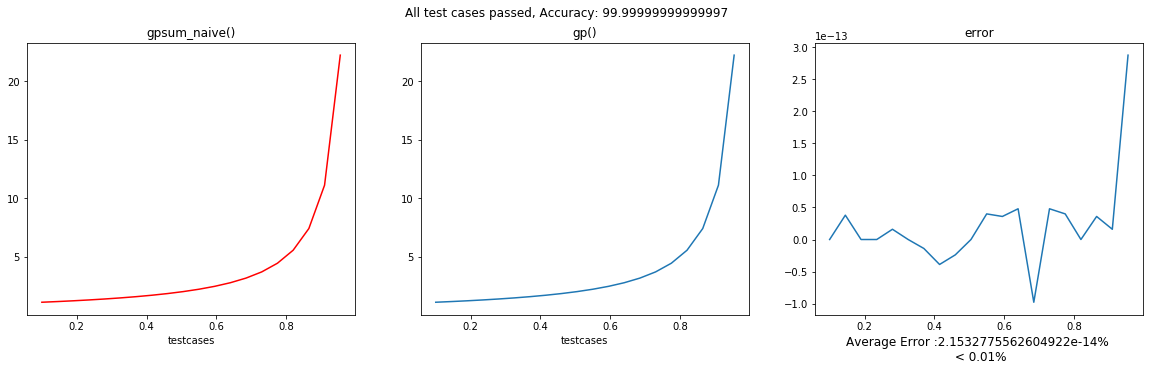

In [5]:
theSeenAndTheUnseenTest(gpsum_naive, gp, np.linspace(0.1, 1, num = 20, endpoint = False))

The two plots for ```gpsum_naive()``` and ```gp()``` are exactly the same but the error plot shows that there is an error of $1e-13$ between individual testcases. 

Now I have a naive implementation which workds fine for different testcases. But what about its computation time? Is the computation time same for all values of $x$? Is it different? How do I find it? 
<br>Python's ```timeit``` library can be used to time small bits of python code just like its shown below. 

In [6]:
%%timeit
gpsum_naive(0.5)

809 µs ± 142 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Doing this for different values of $x$ would take a lot of time. Just like the testing function I can make a generic function which will plot the runtime for different values of $x$. First I will define a function called ```find_time(function, testcase)``` that will use ```timeit.Timer()``` to time the ```function``` for different values of $x$ in ```testcase``` and return them in a list. Another function ```plot_time(testcase, plotNaive, **kwargs)``` will plot the list returned by ```find_time()``` along with speedup with respect to the naive implementation. ```**kwargs``` is used when the number of parameters are not fixed. This way I don't have to worry about the number of functions I have to pass to ```plot_time()``` and compare any number of functions.    

In [7]:
def find_time(testcase, func):
    '''
    Calculates computation time for each testcase
    Appends it in the list
    And returns the list -> time[]
    '''
    time = []
    for i in testcase:
        t = timeit.Timer("func(i)", globals={"func": func, "i": i})
        time.append(t.timeit(number = 7))
    return time
    #return time, mean

def plot_time(testcase,plotNaive, **kwargs):
    '''
    This function plots two graphs
    1. Runtime
    2. Speedup with respect to naive implementation
    
    plotNaive is a boolean variable 
    if plotNaive = True:
        plot runtime for naive in graph-1
    else :
        don't plot naive runtime
        
    **kwargs is a dictionary of tuples - (list of time, function)
    
    '''
    
    legend_list = []                        #legend for graph 1 - runtime
    legend_list_speedup = []                #legend for graph 2 - speedup
    avg_time = []                           #average time for different functions
    fno = 0
    base_list = []                          #runtime of naive implementation or any function you want to calculate speedup against
    time_list = []                          #contains lists of runtime for different functions in kwargs
    
    #iterating through kwargs
    for key, value in kwargs.items():
        time_list.append(value[0])                     #value = (list of runtime for a function, function)      
        avg_time.append(statistics.mean(value[0]))
        legend_list.append(value[1].__name__+"()")
        
        if fno == 0:                                
            base = value[1]                            #storing naive for finding speedup
            base_list = copy.deepcopy(value[0])
        fno += 1
        
    #for plotting time of only one function
    if fno == 1:
        fig, ax = plt.subplots(1, 1, figsize = (5,5))
        ax.plot(testcase, time_list[0])
        ax.set_ylabel("time")
        ax.legend(legend_list)
        ax.set_title("Runtime") 
        xlabel = "$x$"
        for i in range(len(legend_list)):
            xlabel = xlabel + "\n avg time for "+legend_list[i]+": "+str(avg_time[i])
        ax.set_xlabel(xlabel)


    #for plotting time of multiple functions and their speedup compared to naive
    else:
        fig, ax = plt.subplots(1, 2, figsize = (12, 5))

        xlabel_runtime = "$x$"
        xlabel_speedup = "$x$"
        
        if plotNaive == False :
            start = 1                                   
        else:
            start = 0
        
        for i in range(start, len(time_list)):
            ax[0].plot(testcase, time_list[i])              #plotting runtime
            
            if i > 0:
                speedup = [round(b / m, 7) for b,m in zip(base_list, time_list[i])]     #calculating speedup
                ax[1].plot(testcase, speedup)                                           #plotting speedup
                xlabel_speedup = xlabel_speedup + "\n avg speedup for "+legend_list[i] + ": " +str(round(sum(speedup)/len(speedup), 4))

        for i in range(len(legend_list)):
            xlabel_runtime = xlabel_runtime + "\n avg time for "+legend_list[i]+": "+str(avg_time[i])        
                
        #labels for runtime plot
        ax[0].set_ylabel("time")                            
        ax[0].legend(legend_list[start:])
        ax[0].set_title("Runtime") 
        ax[0].set_xlabel(xlabel_runtime)
        
        #labels for speedup
        ax[1].set_title("Speedup with respect to " + base.__name__)                 
        ax[1].set_ylabel("Speedup")                                     
        ax[1].legend(legend_list[1:])
        ax[1].set_xlabel(xlabel_speedup)
     
    

In [8]:
naive_gp = find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_naive)

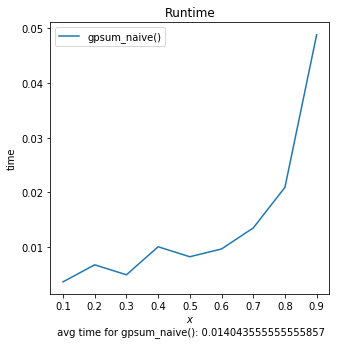

In [9]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (naive_gp, gpsum_naive))

As the value of $x$ is increasing the time is also increasing. For the naive implementation, time depends on number of iterations and iterations depend on how fast or slow the series is converging. I will plot the series for different values of $x$ to understand the relation between $x$ and convergence.

In [10]:
def plot_term(terms, function, string) :
    '''
    This is a generic function
    arguments:
        terms - different values of x for which the terms will be calulated
        function - will return the n^(th) term
        string - shows a general reperesentation of the term
    the function calculates first 30
    5th term is rounded off to its 3rd decimal and highlighted in red
    '''
    l = []
    for x in terms :
        sl = []
        for i in range(0,30) :
            sl.append(function(x,i))
        l.append(sl)

    
    if len(l) == 1 :
        fig, ax = plt.subplots(1,1, figsize = (5,5))
        ax.plot(l[0]);
        ax.set_title(terms[0]);
        ax.set_ylabel(string);
        ax.set_xlabel('i');
    else:
        fig, ax = plt.subplots(1, len(l), figsize = (20,4))
        
        for i in range(0,len(l)) :
            ax[i].plot(l[i]);
            ax[i].set_title(terms[i]);
            ax[i].set_ylabel(string);
            ax[i].set_xlabel('i');
            ax[i].text(5, l[i][5]+0.05, round(l[i][5],3), color = 'red')


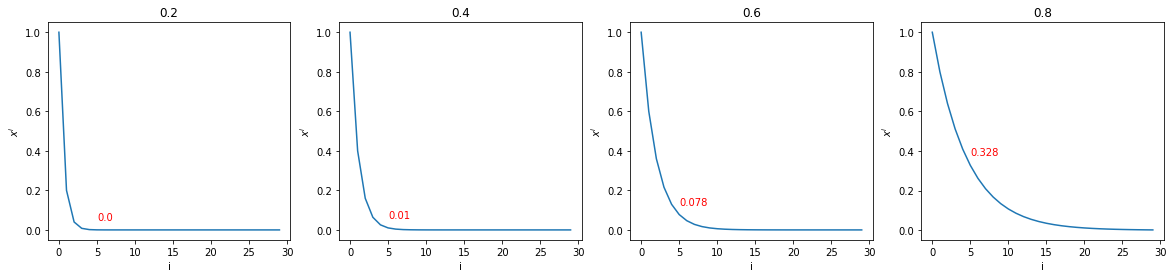

In [11]:
def gp_terms(x, i):
    return x**i
terms = [0.2, 0.4, 0.6, 0.8]
plot_term(terms, gp_terms, "$x^i$")

As the term number increases the value of the term decreases. The rate at which this happens is a function of $x$. For lower values of $x$ the terms drop down a lot faster. This is why the time and no.of iterations increase as the value of x increases. 
<p>Why did I do all this? The naive implementation is done and it gives the right output but thats not enough. Earlier I talked about performance as an unseen aspect of a good software. A good software gives the right output in minimum time. To optimize a function I need to understand what factors are affecting its performance. With the help of visualization I understood how the runtime differs for different values of $x$ and what is the relation between them. So now I can think of one way to increase performance is by reducing the number of iterations.<br>I can think of other ways to optimize by observing the naive implementation. Since I am calculating the power at every iteration, I could find a faster method to do it. Also notice the way I am finding each term. I am directly finding $x^n$ whereas the definition itself says that every term is the product of previous term and the common ratio. This will be my third case of optimization. In the end I will put these 3 cases together and see what effect I get on speed up and accuracy. The diagram below shows the different optimizations I will be performing on naive. 

![title](img/gp_layout.png) 

______________________

![title](img/gp_iter.png) 

First lets take a look at number of iterations taken by naive implementation for different values of $x$. Following is a generic function that will plot the number of iterations for any function passed to it.

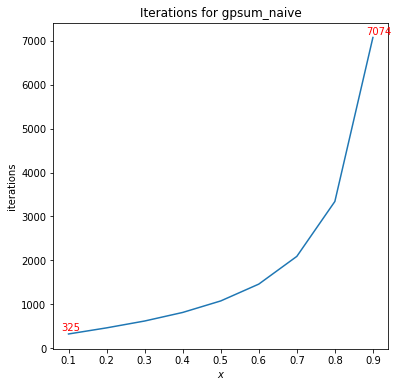

In [12]:
def plot_iterations(testcase, function):
    itr = []
    
    for i in testcase:
        itr.append(function(i)[1])
        
    fig, ax = plt.subplots(1, 1, figsize = (6,6))
    ax.plot(testcase, itr)
    ax.set_xlabel('$x$')
    ax.set_ylabel('iterations')
    ax.text(testcase[0] - testcase[-1]*0.02, itr[0] + itr[-1]*0.01, itr[0], color = 'red')
    ax.text(testcase[-1] - testcase[-1]*0.02, itr[-1] + itr[-1]*0.01, itr[-1], color = 'red')
    ax.set_title('Iterations for '+ function.__name__)
    
plot_iterations(np.linspace(0.1, 1, 9, endpoint = False), gpsum_naive)

The number of iterations are going up to 7074 for $x = 0.9$. Since $x$ is a float, $x^n$ is also going to be a float and python has 53 bits of precision for float therefore the function goes on iterating till the last bit. This level of precision gives an error of 2.153e-14%. My goal is to get an error less than 0.01 which this satisfies perfectly but maybe I could trade accuracy for speed just enough so that the error still remains below 0.01%. 

In [13]:
def gpsum_iterations(a):
    s = 0
    count = 0
    t = 1
    actual = gp(a)
    '''
    error should be < 0.01
    and error = ((actual - s)/actual)*100
    Therefore, s = actual*(1 - 0.0001) = check
    '''
    check = actual*(1 - 0.0001)
    
    #while(b != 0):
    while s < check:
        t = pow(a, count)
        s = s + t
        count = count + 1
    return s, count

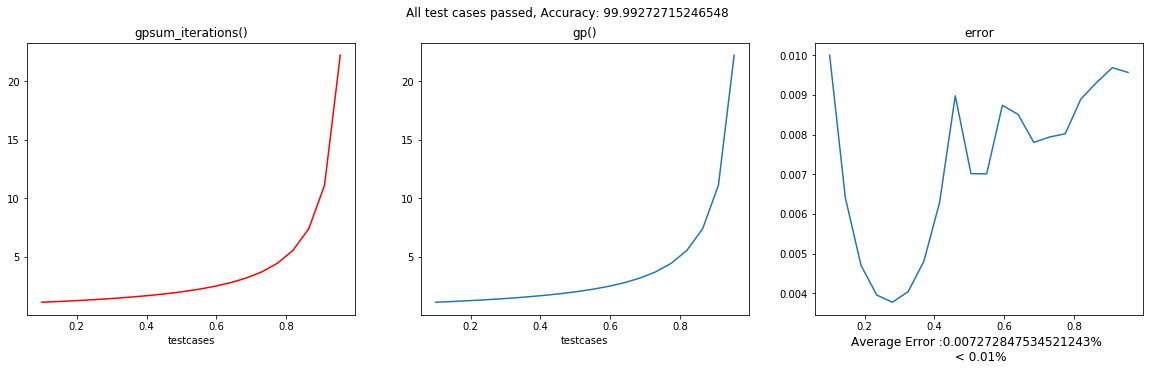

In [14]:
theSeenAndTheUnseenTest(gpsum_iterations, gp, np.linspace(0.1, 1, num = 20, endpoint = False))

```gpsum_iterations()```, ```gpsum_naive()``` and ```gpsum_naive()``` look exactly the same. But look at the error plot how different they are. I am again calling the test function on ```gpsum_naive()``` so that you can see the similarity and difference between the 2 functions. Without the error plot I would just know that the average error is < 0.01 but I wouldn't know how it varies for individual values. 

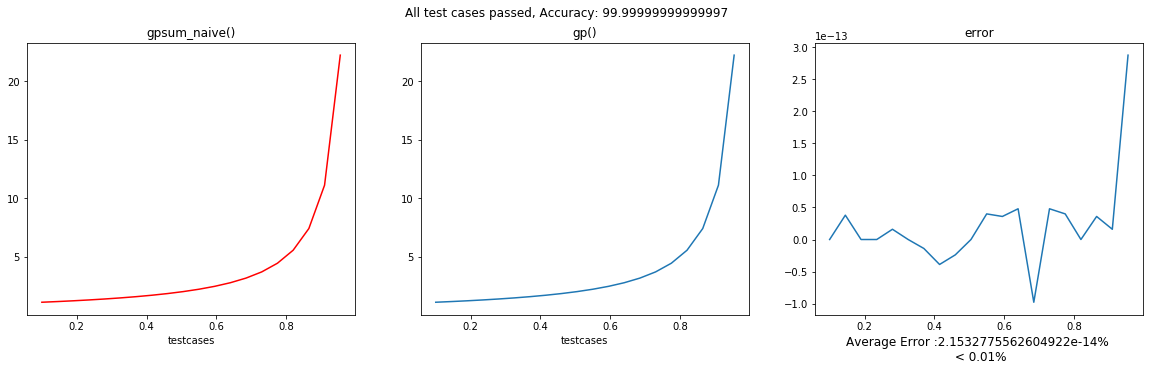

In [15]:
theSeenAndTheUnseenTest(gpsum_naive, gp, np.linspace(0.1, 1, num = 20, endpoint = False))

What about the performance? 

In [16]:
iterations_gp = find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_iterations)

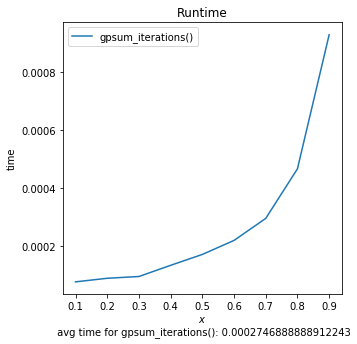

In [17]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (iterations_gp, gpsum_iterations))

Comparing this runtime with naive implementation.

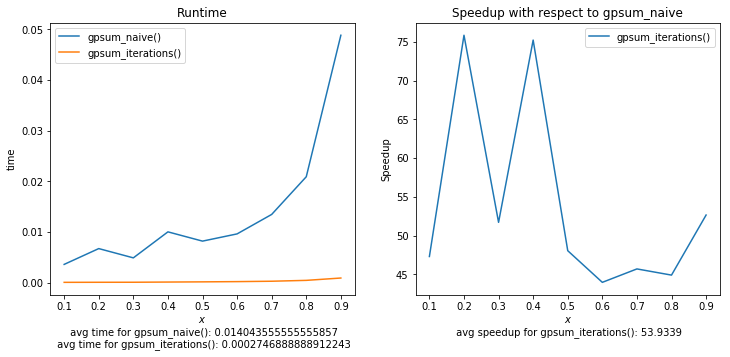

In [18]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, 
          first = (naive_gp, gpsum_naive), second = (iterations_gp, gpsum_iterations))

The maximum time for ```gpsum_naive``` is $30ms$ and for ```gpsum_iterations``` is $0.25ms$. You see the difference? The speedup for individual values is different but average speedup is $87\times$.

#### This is 87x faster

I got this speedup by reducing the number of iterations. To compare the number of iterations of ```gpsum_naive()``` and ```gpsum_iterations()``` I will write a function which plots them for different values of $x$. Since I would be comparing iterations for other optimizations in exponential or sine, cosine series I will make this function generic.

In [19]:
'''
    compare_functions() takes 4 parameters -function1, function2, function3, type of the function.
    Function 1 and 2 need to return a tuple containing value of series 
    and the number of itertations. 
    Function 3 returns the actual value of the series. 
    
    compare_function will plot 2 graphs
    Graph 1 - Iterations taken by func1 and func2 
    Graph 2 - Values calculated by all 3 functions
'''
def compare_functions(func1, func2, func3, function, testcases):
    
    itr1 = []                       #iterations for func1
    itr2 = []                       #iterations for func2
    actual = []                     #actual ans for series
    ans1 = []                       #ans returned by func1
    ans2 = []                       #ans returned by func2
    
    for i in testcases :
        tup1 = func1(i)
        tup2 = func2(i)
        itr1.append(tup1[1])        #storing iteration
        itr2.append(tup2[1])
        ans1.append(tup1[0])        #storing ans
        ans2.append(tup2[0])
        actual.append(func3(i))  
        
        
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    
    factor_x = testcases[-1]*0.05
    factor_y = itr1[-1]*0.02
    #Graph 1 - Iterations taken by func1 and func2
    ax[0].plot(testcases,itr1, color = 'red')
    ax[0].plot(testcases,itr2)
    ax[0].text(testcases[-1] - factor_x, itr1[-1] + factor_y, itr1[-1])
    ax[0].text(testcases[-1] - factor_x, itr2[-1]+ factor_y, itr2[-1])
    ax[0].text(testcases[0], itr1[0] + factor_y, itr1[0])
    ax[0].text(testcases[0], itr2[0] + factor_y, itr2[0])
    ax[0].legend([func1.__name__+"()", func2.__name__+"()"])
    ax[0].set_title("Iterations")
    ax[0].set_ylabel("No.of Iterations")
    ax[0].set_xlabel("$x$")
    
    #Graph 2 - Values returned by the 3 functions
    ax[1].plot(testcases, ans1, color = 'red')
    ax[1].plot(testcases, ans2)
    ax[1].plot(testcases, actual)
    ax[1].legend([func1.__name__+"()",func2.__name__+"()",func3.__name__])
    ax[1].set_title("Values of "+function)

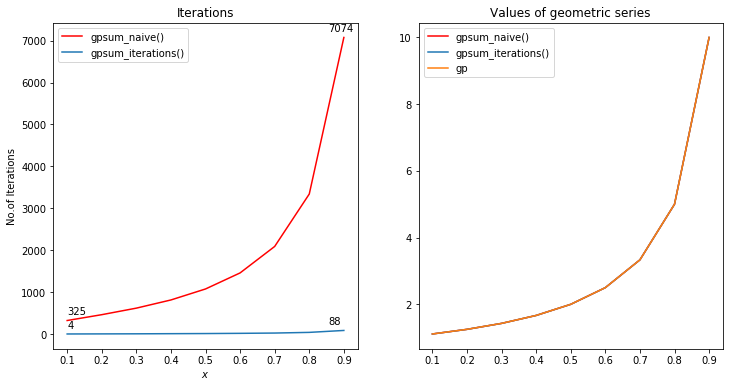

In [20]:
compare_functions(gpsum_naive,gpsum_iterations,gp,"geometric series", np.linspace(0.1, 1, num = 9, endpoint = False))

For ```gpsum_naive()``` the iterations are between 300 - 7074, where as for ```gpsum_iterations()``` its between 3 - 88. By identifying the right terminating condition I increased the performance by 87x and kept the error below 0.01. 87x and 0.01 are just numbers but by visualizing the speedup and comparing iterations I understood the impact it made on the function. For naive implementation the number of iterations increase almost exponentially but for optimized case the maximum number of iterations are 88. Which is less than the least number of iterations in naive implementation. 

| Optimization | Geometric Series   | Speed Up |
|------|------|------|
|   Naive  |$11.7 ms$| - |
| Iterations | $149\mu s$ | $72\times$|

______________________

![title](img/gp_pow.png) 

In [21]:
def gpsum_power(a):
    s = 0
    i = 0
    b = 1
    while(b != 0) :
      # b = pow(a, i) 
        b = a**i
        s = s + b
        i = i + 1
    return s, i

I've replaced ```pow(a, i)``` with ```**```, before checking anything else lets call the testing function on ```gpsum_power()```.

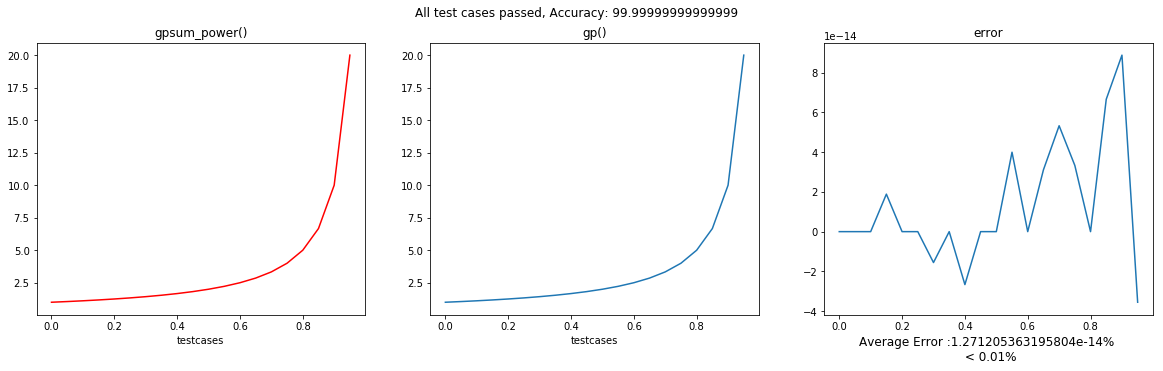

In [22]:
theSeenAndTheUnseenTest(gpsum_power, gp, np.linspace(0, 1, num = 20, endpoint = False))

I've replaced one inbuilt function with another to check how it affects the performance but before doing so let's check the similarity or difference between the error of the two functions. I'm calling the test function again on ```gpsum_naive()```.

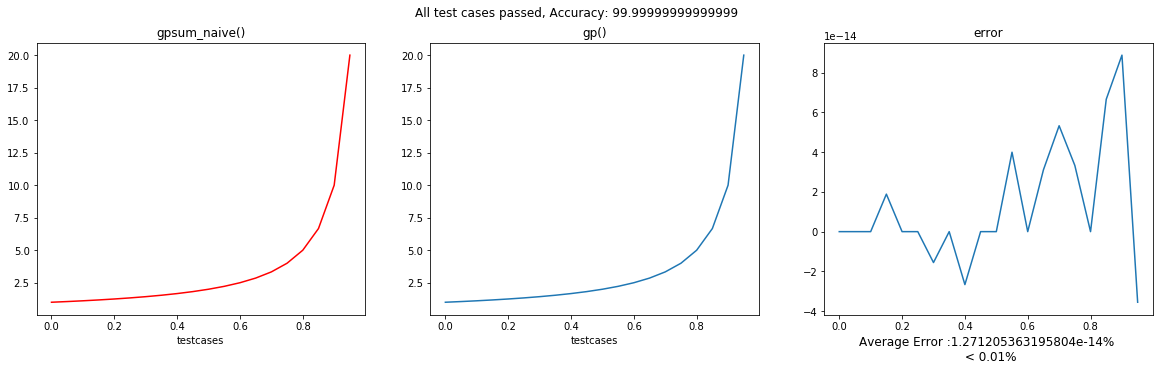

In [23]:
theSeenAndTheUnseenTest(gpsum_naive, gp, np.linspace(0, 1, num = 20, endpoint = False))

See the error value is exactly the same. To see how it affects the performance I will call ```plot_time()``` on ```gpsum_power()```.

In [24]:
power_gp = find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_power)

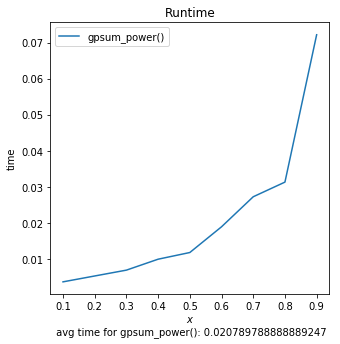

In [25]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), False, first = (power_gp, gpsum_power))

Let's compare it with ```gpsum_naive()```.

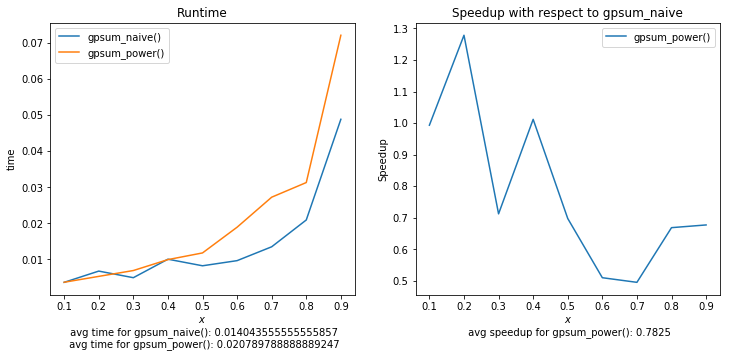

In [26]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (naive_gp, gpsum_naive), second = (power_gp, gpsum_power))

The time taken for naive and power optimization is almost the same. For some values its less while for some its more. Changing the power function doesn't make any significant difference. Therefore I won't be considering this as an optimization case.

------

![title](img/gp_calc.png)


In [27]:
def gpsum_cal(a):
    s = 1
    t = 1
    i = 1
    while t != 0:
        t = t*a
        s += t
        i += 1
    return s, i

In [ ]:
theSeenAndTheUnseenTest(gpsum_cal, gp, np.linspace(0, 1, num = 20, endpoint = False))

In ```gpsum_cal()``` I am multiplying a at every iterations because of which the value of the term never really drops down to zero and the loop runs infinitely. To verify this I will run the loop till 7100 iterations as this was the maximum no.of iterations for naive. 

In [28]:
def gpsum_cal_check(a):
    s = 1
    t = 1
    i = 1
    while t != 0 :
        t = t*a
        s += t
        i += 1
        if i >= 7100 :
            print("Runtime too long")
            print("Second last term = ", t)
            print("Last term = ", t*a)
            print("")
            i += 1
            break
    return s, i

In [29]:

a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in np.linspace(0.1, 1, num = 9, endpoint = False):
    print(i,": ", gpsum_cal_check(i))


0.1 :  (1.1111111111111112, 325)
0.2 :  (1.25, 464)
0.30000000000000004 :  (1.4285714285714288, 621)
0.4 :  (1.6666666666666672, 815)
0.5 :  (2.0, 1076)
Runtime too long
Second last term =  5e-324
Last term =  5e-324

0.6 :  (2.5000000000000004, 7101)
Runtime too long
Second last term =  5e-324
Last term =  5e-324

0.7000000000000001 :  (3.333333333333332, 7101)
Runtime too long
Second last term =  1e-323
Last term =  1e-323

0.8 :  (5.000000000000001, 7101)
Runtime too long
Second last term =  2.5e-323
Last term =  2.5e-323

0.9 :  (9.999999999999998, 7101)


The last and the second last terms are the same. I will use this as new terminating condition, the loop will go on till the last iteration possible and will stop when the values of the terms stop reducing. To see what the impact is on the number of iterations I will call ```compare_function()``` on ```gpsum_calculation()```, ```gpsum_naive()``` and ```gpsum_iterations```.
<br>```gpsum_calculation()``` terminates when the terms stop reducing in value. 

In [30]:
def gpsum_calculation(a):
    s = 1
    t = 1
    i = 1
    t1 = 0
    t2 = 1.0
    
  # while t != 0: 
    while t1 != t2 :
      # t = pow(a, i)
        t = t*a
        s += t
        i += 1
        t1 = t2     #second last term
        t2 = s      #last term
    return s, i

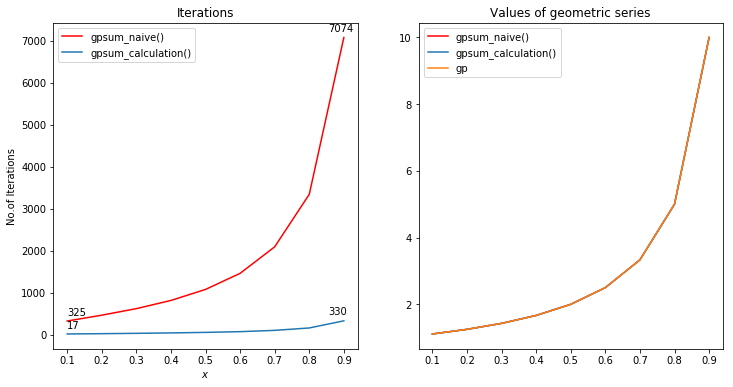

In [31]:
compare_functions(gpsum_naive, gpsum_calculation, gp, "geometric series", np.linspace(0.1, 1, num = 9, endpoint = False))

The number of iterations have lowered significantly so the speedup that I'll get from ```gpsum_calculation()``` will be a result of the new terminating conditioin and the calculation modification.

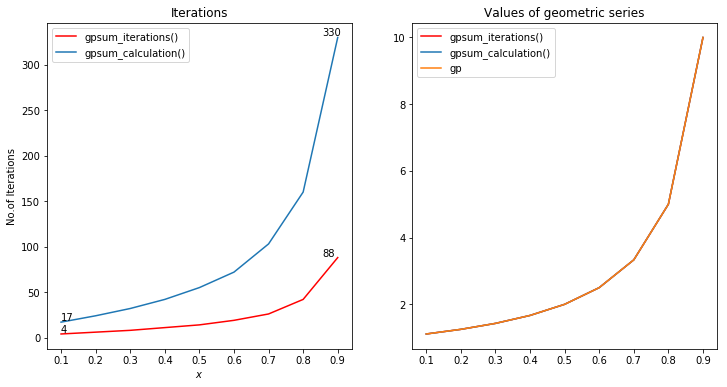

In [32]:
compare_functions(gpsum_iterations, gpsum_calculation, gp, "geometric series", np.linspace(0.1, 1, num = 9, endpoint = False))

There is a new terminating condition and a new way to calculate the terms, I need to ensure that these changes are still giving the right output. I will call the testing function on ```gpsum_calculation()``` and check for correctness.

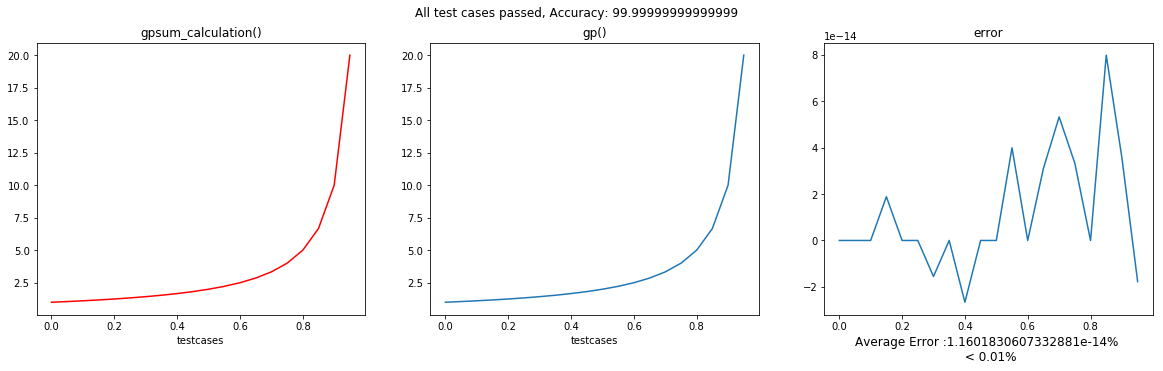

In [33]:
theSeenAndTheUnseenTest(gpsum_calculation, gp, np.linspace(0, 1, num = 20, endpoint = False))


In [34]:
calculations_gp = find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_calculation)

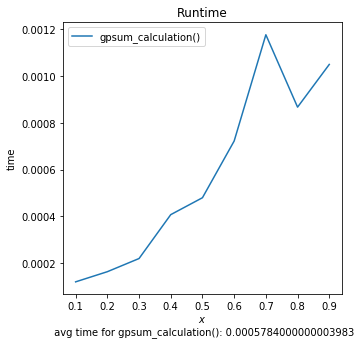

In [35]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (calculations_gp, gpsum_calculation))

Speedup with respect to naive implementations.

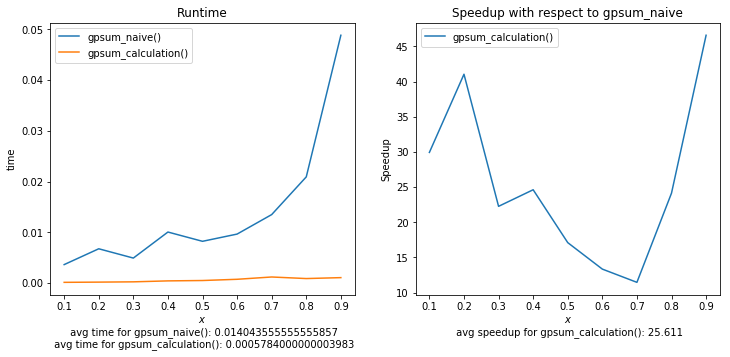

In [36]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True,
          first = (naive_gp, gpsum_naive), second = (calculations_gp, gpsum_calculation))

### Average speedup is $60\times$

By realising that the term calculated in one iteration can be used in the next the function becomes $60\times$ faster. 

| Optimization | Geometric Series   | Speed Up |
|------|------|------|
|   Naive  |$8.9 ms$| - |
| Iterations | $0.8\mu s$ | $75\times$|
| Calculation | $260 \mu s$ | $35\times$|

______________

![title](img\gp_alloptim.png)

In [37]:
def gpsum_allopts(a):
    s = 1
    t = 1
    count = 1 
    actual = gp(a)
    check = actual*(1 - 0.0001)
    
    #while(b != 0):
    #while t1 != t2:
    while s < check:
      # t = pow(a, i)
        t = t*a
        s = s + t
        count += 1
    return s, count

I've replaced the naive terminating condition with the ```gpsum_iterations```, added ```gpsum_calculation``` optimization. With these two changes made I need to ensure that I am not giving up too much of accuracy. I will ```theSeenAndTheUnseenTest()``` on ```gpsum_allopts```.

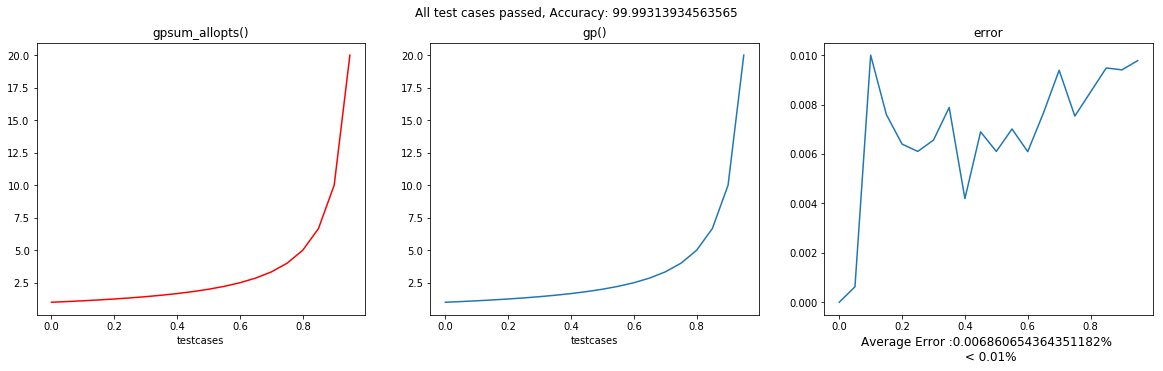

In [38]:
theSeenAndTheUnseenTest(gpsum_allopts, gp, np.linspace(0, 1, num = 20, endpoint = False))

Aha! The ```gpsum_iterations()``` condition is keeping the error below 0.01. Now lets see the performance of ```gpsum_allopts```.

In [39]:
all_optimizations_gp = find_time(np.linspace(0.1, 1, 9, endpoint = False), gpsum_allopts)

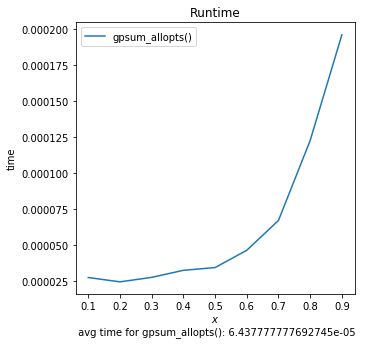

In [40]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, first = (all_optimizations_gp, gpsum_allopts))

Comparing it with naive implementation

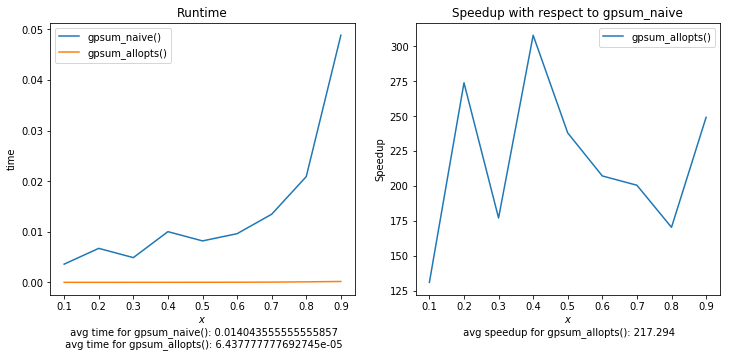

In [41]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, 
          first = (naive_gp, gpsum_naive), second = (all_optimizations_gp, gpsum_allopts))

### Speedup of $200\times$

Using ```plot_time()``` I will plot performance of all functions just to summarize what all is done till now.

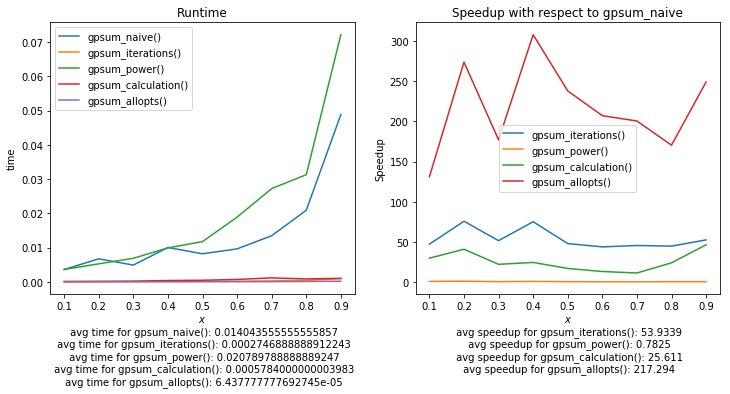

In [42]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), True, 
          first = (naive_gp, gpsum_naive), 
          second = (iterations_gp, gpsum_iterations),
          third = (power_gp, gpsum_power), 
          fourth = (calculations_gp, gpsum_calculation),
          fifth = (all_optimizations_gp, gpsum_allopts))

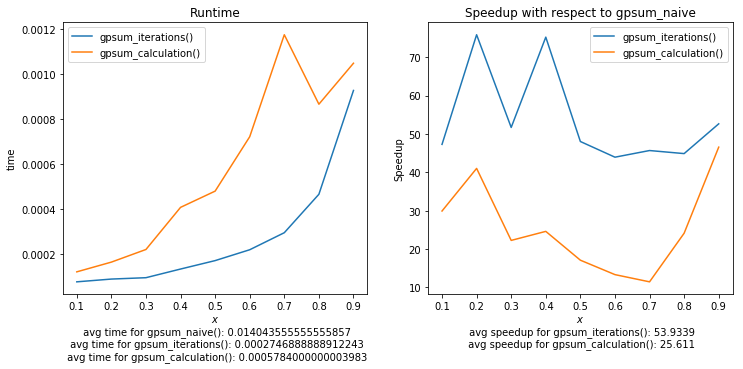

In [43]:
plot_time(np.linspace(0.1, 1, 9, endpoint = False), False, 
          first = (naive_gp, gpsum_naive), 
          second = (iterations_gp, gpsum_iterations), 
          fourth = (calculations_gp, gpsum_calculation))
# plot_time(np.linspace(0.1, 1, 9, endpoint = False),False,
#           allopts = gpsum_naive,
#           gpsum_iterations = gpsum_iterations,
#           gpsum_calculation = gpsum_calculation)

To get a clear view I will plot ```gpsum_iterations()```, ```gpsum_calculation()```, ```gpsum_allopts()``` together using ```plot_time```.

With all these optimizations the highest computation time has come down from $0.05s$ to somewhere near $0.1ms$. 

| Optimization | Geometric Series   | Speed Up |
|------|------|------|
|   Naive  |$15.1 ms$| - |
| Iterations | $149\mu s$ | $139\times$|
| Calculation | $235 \mu s$ | $60\times$|
|All optimzations| $117 \mu s$|$85 \times$|

The speedup here is additive in nature. With iteration, there was a speedup of 140x, calculations gave a speedup of 60x and putting the two together there is a speedup of 230x. To reach this speedup I had to see what factor were affecting the performance and how. By making the right choices during implementation and minimising unnecessary computation I could increase the performance $230\times$ along with 99.99% accuracy. 
<p>It was a gradual process. First there was a naive implementation, which was tested for correctness. Then looked at its performance. To get a clear understanding about the performance I visualized the series and number of iterations for different values of $x$. Then came a question of why iterations were so high and eventually came up with the iterations optimization case. The calculations optimization was made by simply observing the redundant calculation of terms at every iteration. Through out the process there was visualization of testing, performance and speedup which showed the impact made by respective changes on the naive implementation. Visualization is one unseen aspect that helps in understanding and improving other unseen aspects of the function.
<p>What the user sees in the end is a program meeting its requirements - giving the right output. He can't see role or importance of visualization, optimization and testing that helped in developing the end product. These unseen aspects help in improving the performace and quality of the product while developing it and determine the quality of the product after developing it. 

***

### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 

In the exponential funciton there is a factorial in every term. Python provides a math.factorial(x) function that calculates the factorial of x. This adds to one more case in optimization of the function.
<br>Following are the optimizations that I will be working on for this function.
![title](img/exp1.png)


<p> In the end I will put these optimizations together to see how it affects the efficiency and accuracy. 

***

#### 1] Finding the terminating condition
<p>The following graph shows the $terms\ in\ e^2$, $terms\ in\ e^5$

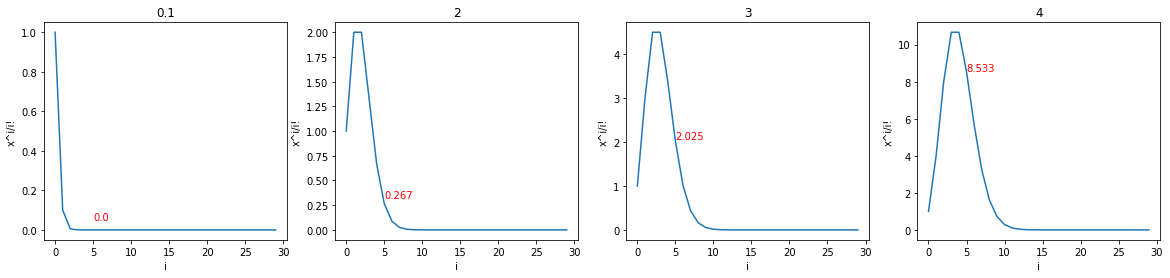

In [44]:
def terms_exp(x, i):
    return x**i/math.factorial(i)

plot_term([0.1, 2, 3, 4], terms_exp, "x^i/i!")

In the exponential function the terms go as $1 + x + \frac{x^2}{2!}$. We've seen in geometric series that for $|x| < 1$ the series converges as the power increases. In case of $x > 0$, the terms will increase as the power increases but there is division by factorial which brings the series down to zero. That is why in the first plot of $x = 0.1$ the series just converges whereas in the other 3 plots it increases to a certain value and then goes on decreasing. This is because the denominator increases at a greater rate than the numerator. Also note that as the value of $x$ is increasing the series converging slowly.
<br>In all the graphs, after a certain value of $i$ the terms don't change in value. I will use this as my terminating condition.

In [45]:
# def exp(x):
#     s = 0
#     t = 1.01
#     float(t) 
#     i  = 0 
#     while t != 0:
#         t = float(x**i/math.factorial(i))
#         s += t
#         i += 1
#     return s,i

def exp_naive(x):
    s = 1
    t = 1
    t1 = 1
    t2 = 0
    float(t) 
    i  = 1 
    while t2 != t1:
        t = float(x**i/math.factorial(i))
        s += t
        i += 1
        t2 = t1 
        t1 = s
    return s,i

I need to check this for correctness.

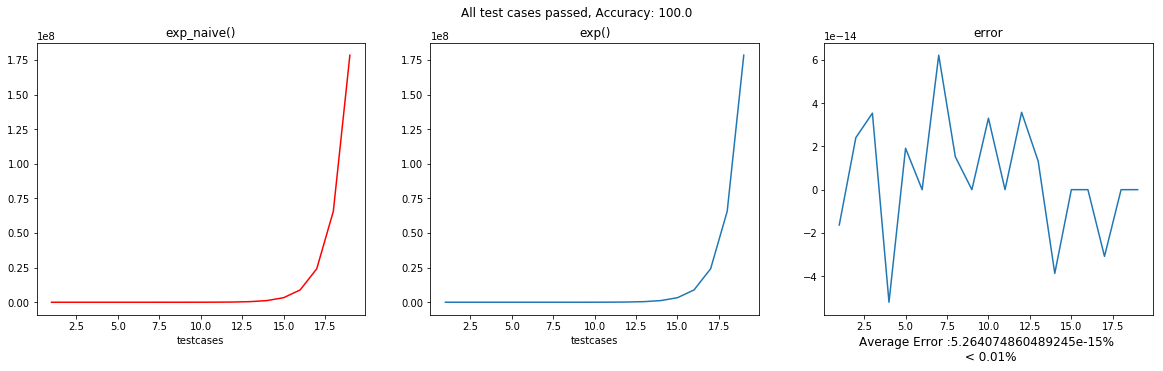

In [46]:
theSeenAndTheUnseenTest(exp_naive, math.exp, np.linspace(1, 20, num = 19, endpoint = False))

In [47]:
expnaive_time = find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_naive)

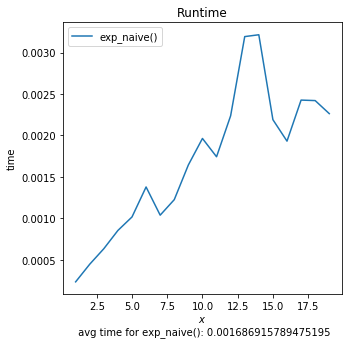

In [48]:
plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, first = (expnaive_time, exp_naive))

As the values of $x$ is increasing the computation time is increasing. The ```plot_term()``` graph also showed that as the value is $x$ increases the series converges slowly. This implies that the iterations are high for higher values of $x$.
<p>


| Optimization | Geometric Series   | Speed Up | Exponential | Speed up|
|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - |
| Iterations | $149\mu s$ | $139\times$| |
| Calculation | $235 \mu s$ | $60\times$||
|All optimzations| $117 \mu s$|$85 \times$||

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### 1. Iterations
![title](img/exp_iter.png)

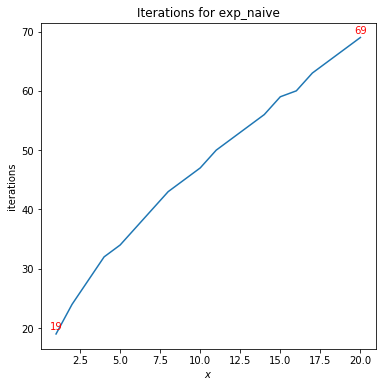

In [49]:
#exp(5)
plot_iterations(np.linspace(1, 20, 20, endpoint = True), exp_naive)

For geometric series the number of iterations were reduced by terminating once the error was below 0.01%. I will use the same case for exponential function.

In [50]:
def exp_iterations(x):
    e = 0
    i = 0 
    t = 1
    actual = math.exp(x)
    check = actual * (1  - 0.0001)
    while e < check :
        e += x**i/math.factorial(i)
        i += 1
    return e, i


Testing it for correctness.

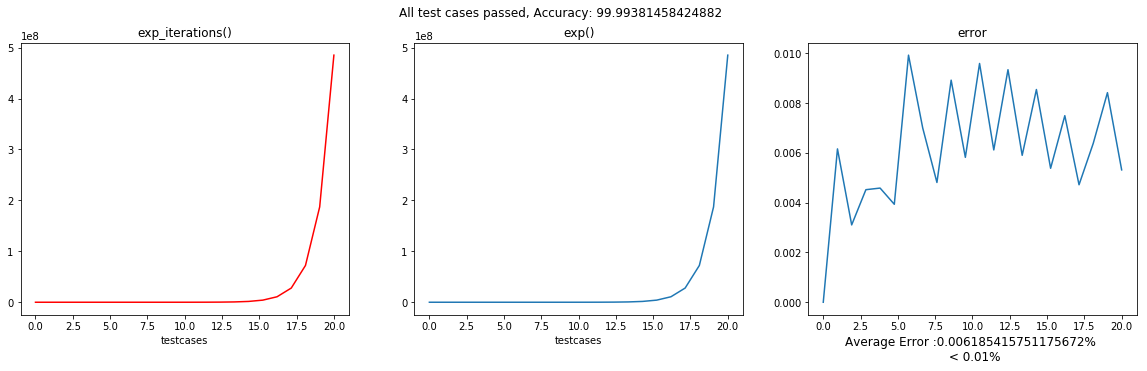

In [51]:
theSeenAndTheUnseenTest(exp_iterations, math.exp, np.linspace(0, 20, num = 22, endpoint = True))

In [52]:
expiterations_time = find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_iterations)

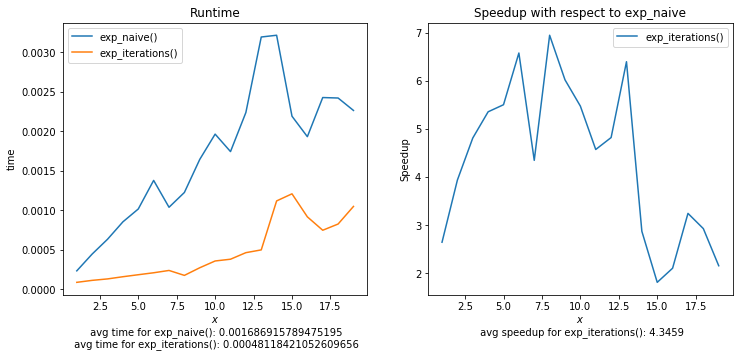

In [53]:
plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (expiterations_time, exp_iterations))

#### Optimizing the no.of iterations gives a speed up of $2\times$

Comparing the number of iterations taken by the naive approach and optimized function.

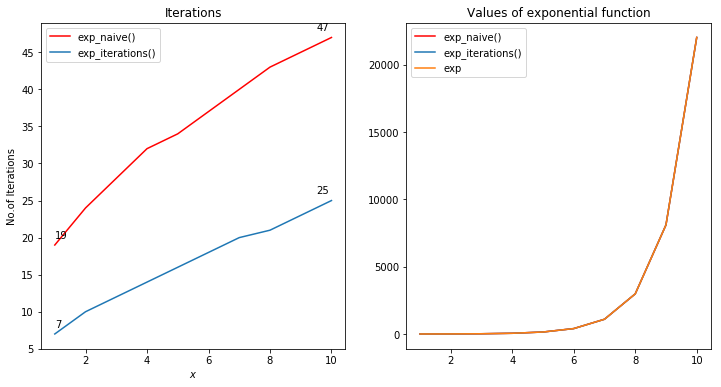

In [54]:
compare_functions(exp_naive, exp_iterations, math.exp, "exponential function", np.linspace(1, 10, num = 10, endpoint = True))

#### The number of iterations are reduced to half

In the exponential function the number of iterations are converging a lot faster than those in the geometric progression. This is because there is division by factorial.

| Optimization | Geometric Series   | Speed Up | Exponential | Speed up|
|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$|
| Calculation | $235 \mu s$ | $60\times$||
|All optimzations| $117 \mu s$|$85 \times$||

***

#### 2] Replacing power function
![title](img/exp_power.png)

In [55]:
def exp_power(x):
    e = 1
    t = 1
    term = 1
    i = 1 
    t1 = 1
    t2 = 0
    while t1 != t2:
        term = term*x
        t = term / math.factorial(i)
        e += t
        i = i + 1
        t2 = t1
        t1 = e
    return e, i

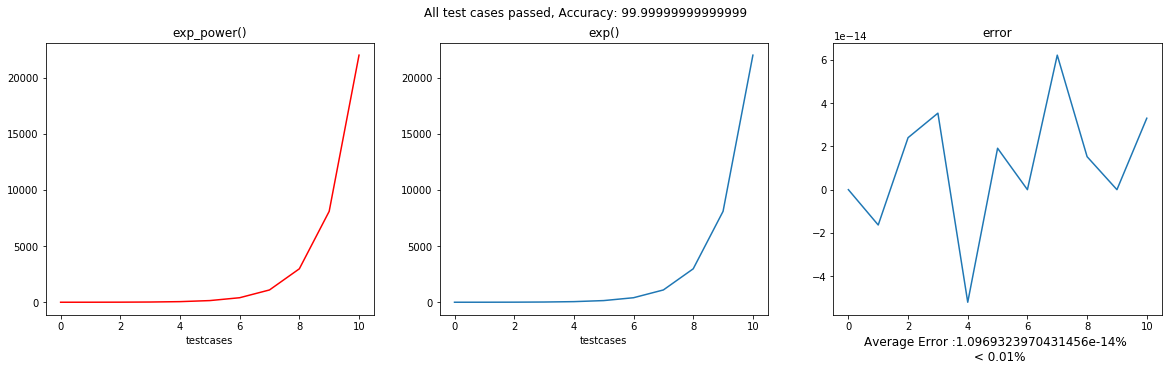

In [56]:
theSeenAndTheUnseenTest(exp_power, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [57]:
exppower_time = find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_power)

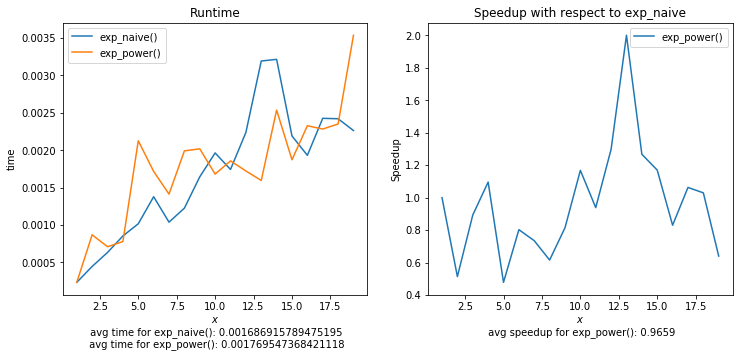

In [58]:
plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (exppower_time, exp_power)         
         )

The power optimization alone is no speedup, it is probably because of calculating the factorial term and then dividing the numerator.<br>
I can find the factorial in the same way as I am finding the power and see if it has any effect on runtime.
<p>

| Optimization | Geometric Series   | Speed Up | Exponential | Speed up|
|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$|
| Power Calculation | $235 \mu s$ | $60\times$| $2.3 ms$| $0.5\times$|
|All optimzations| $117 \mu s$|$85 \times$||

***


#### 3] Replacing factorial 
![title](img/exp_factorial.png)

Factorial of any given number $n!$  is given as 
<br>
$n! = (n) \cdot (n-1) \cdot (n-2) \dots 2 \cdot 1$
<br>In our function as we go on iterating, we are incrementing the value of $i$ by $1$ and at every iteration we are finding the value of math.factorial(i). Instead we can store the initial value of $i$ and $1$ and go on multiplying that value at every iteration.

<br>$Iteration - 1 \space \space i = 1 \space \space fact = 1$<br><br>$Iteration - 2 \space \space i = 2 \space \space fact = 1\cdot i$<br><br>$Iteration - 3 \space \space i = 3 \space \space fact = 1\cdot 2 \cdot i$<br><br>$\dots$<br>
<br>

In [59]:
def exp_factorial(x):
    e = 1
    t = 1
    t1 = 1
    t2 = 0
    fact = 1
    i = 1 
    while t1 != t2:
        fact *= i
        t = x**i / fact
        e += t
        i = i + 1
        t2 = t1
        t1 = e
    return e, i


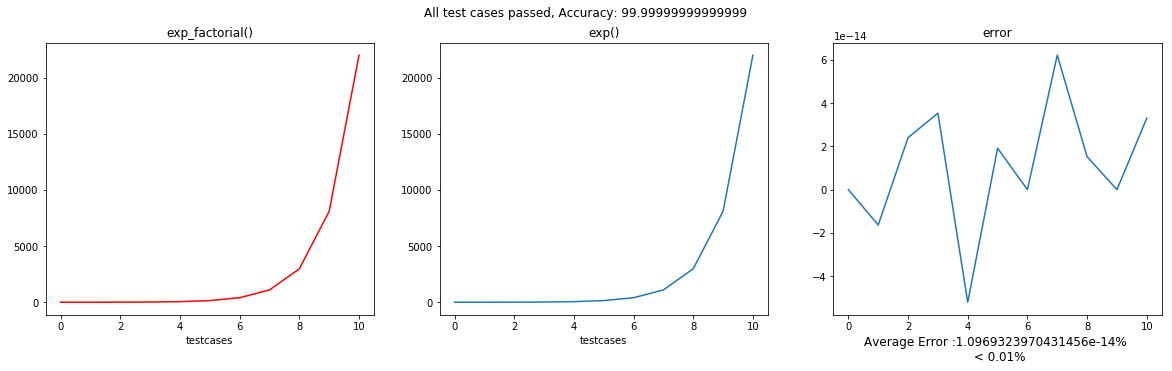

In [60]:
theSeenAndTheUnseenTest(exp_factorial, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [61]:
expfactorial_time = find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_factorial)

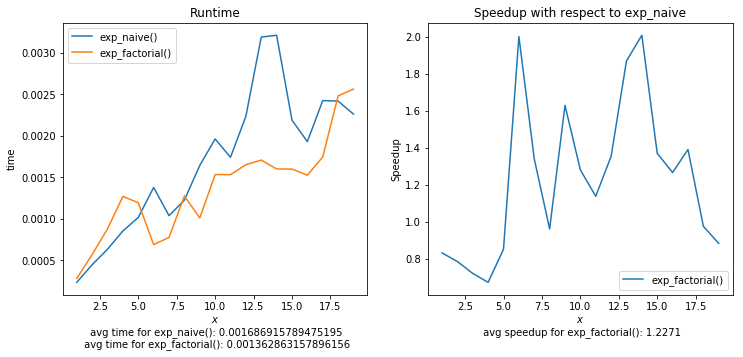

In [62]:
plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (expfactorial_time, exp_factorial)
         )

There is no significant impact on runtime. There is still hope to getting a good speedup when I put the three optimizations together. I would be calculating both factorial and power and terminating as soon as the error is below 0.01%.


| Optimization | Geometric Series   | Speed Up| Exponential | Speed up|
|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$|
| Power Calculation | $235 \mu s$ | $60\times$| $2.3 ms$| $0.5\times$|
| Factorial Calculation | - | - | $1.5 ms$| $0.8 \times$|
|All optimzations| $117 \mu s$|$85 \times$||

***

#### 4] Putting 3 optimizations together
![title](img/exp_allopts.png)

In [63]:
def exp_allopts(x):
    e = 1
    t = 1
    i  = 1 
    term = 1
    fact = 1
    actual = math.exp(x)
    check = actual * (1  - 0.0001)
    while e < check :
        term *= x
        fact *= i
        t1 = term/fact
        e += t1
        i = i + 1
    return e, i

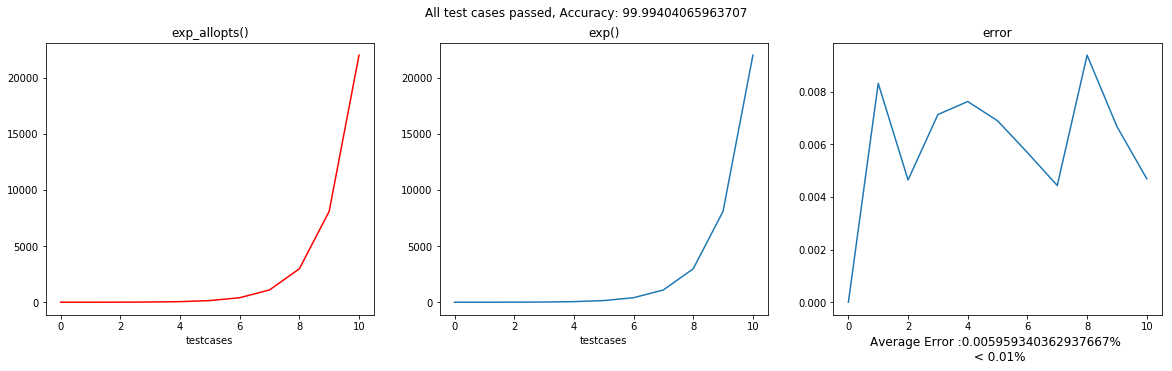

In [64]:
theSeenAndTheUnseenTest(exp_allopts, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [65]:
expallopts_time = find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_allopts)

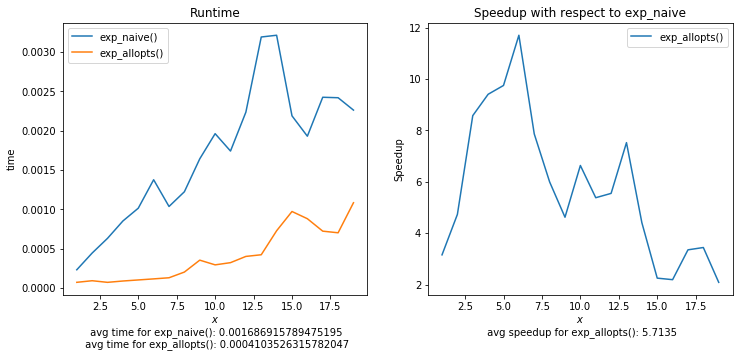

In [66]:
plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (expallopts_time, exp_allopts))

#### We get a speed up of 5x by putting all three of the ideas together. 

<p>
Iterations optimization gave a speedup of $2\times$, power and factorial calculation hardly gave any speedup individually but together they gave a speedup of $5\times$. 
<p>    

| Optimization | Geometric Series   | Speed Up | Exponential | Speed up|
|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$|
| Power Calculation | $235 \mu s$ | $60\times$| $2.3 ms$| $0.5\times$|
| Factorial Calculation | - | - | $1.5 ms$| $0.8 \times$|
|All optimzations| $117 \mu s$|$85 \times$|$3.31 ms$| $5\times$|  

***

### 4. Further Optimization

    
<p>What we are doing here is we are using the previously calculated exponential value multiplying it by $x$ to find the $x^k$ and similarly for factorial $k!$, our iterator is $i$, therefore we multiply our previously calculated factorial value with $i$ to get $i!$. 
<br>
<br>At every iteration we are calculating $\frac{a\cdot a\cdot a ...}{1\cdot2\cdot3...}$
<br>As the no.of iterations increase the numerator and denominator go on increasing in magnitude, we then divide these two large numbers which is relatively another big calculation. 
<br>
<br>Instead of calculating two big terms we can calculate <br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})\cdot\frac{k}{i+1}$<br><br>$(\frac{k}{i}\cdot\frac{k}{i+1})\cdot\frac{k}{i+2}$<br><br>$\dots$<br>

In [67]:
def exp_power_factorial(x):
    e = 1
    t = 1
    term = 1
    fact = 1
    i = 1 
    t1 = 1
    t2 = 0
    while t1 != t2:
        t = t*x / i
        e += t
        i = i + 1
        t2 = t1
        t1 = e
    return e, i

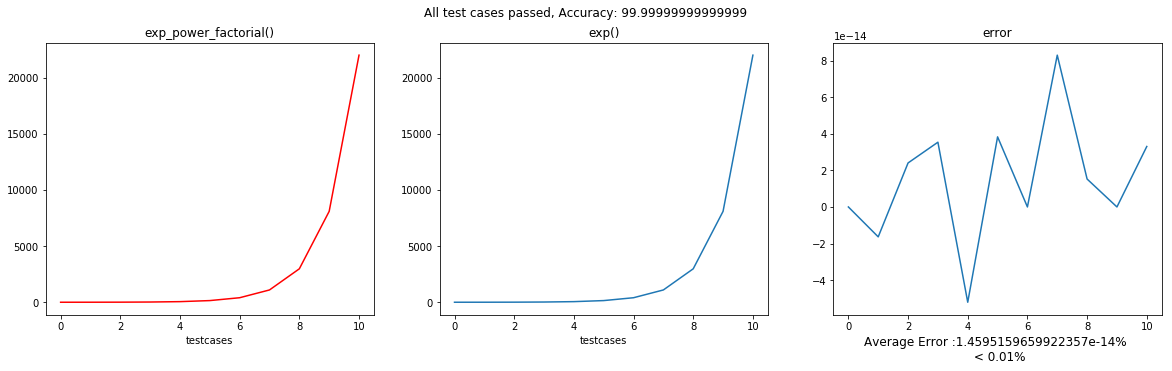

In [68]:
theSeenAndTheUnseenTest(exp_power_factorial, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [69]:
exppowerfactorial_time = find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_power_factorial)

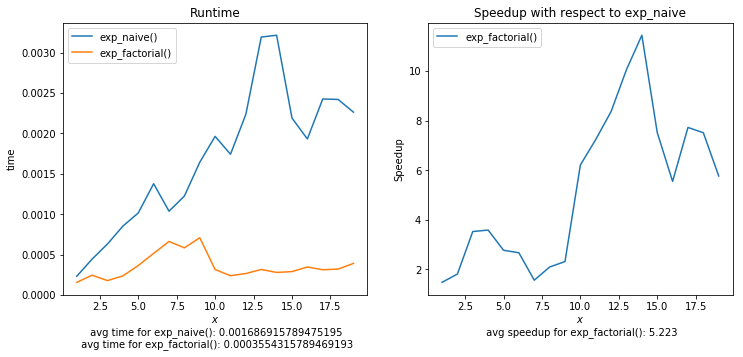

In [70]:
plot_time(np.linspace(1, 20, num = 19, endpoint = False), True,
          first = (expnaive_time, exp_naive),
          second = (exppowerfactorial_time, exp_factorial)
         )

### Speedup of $2\times$
By simply making a small change in calculation I got a speedup of $2\times$. Let's see what is the speedup when I put this with the iteration optimization.

In [71]:
def exp_allopts2(x):
    e = 1
    t = 1
    i = 1 
    term = 1
    fact = 1
    actual = math.exp(x)
    check = actual * (1  - 0.0001)
    while e < check :
        t = t*x/i
        e += t
        i = i + 1
    return e, i + 1

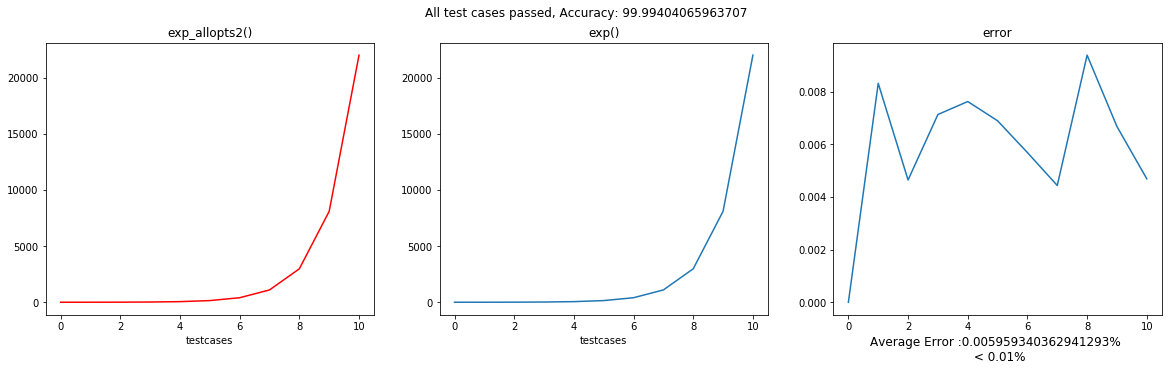

In [72]:
theSeenAndTheUnseenTest(exp_allopts2, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [73]:
expfurtheropt_time = find_time( np.linspace(1, 20, num = 19, endpoint = False), exp_allopts2)

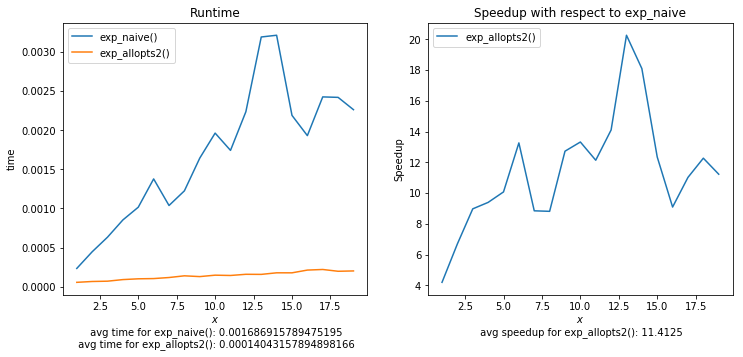

In [74]:
plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (expfurtheropt_time, exp_allopts2))

#### Speedup of $7\times$ compared to Naive implementation !

| Optimization | Geometric Series   | Speed Up | Exponential | Speed up|
|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$|
| Power Calculation | $235 \mu s$ | $60\times$| $2.3 ms$| $0.5\times$|
| Factorial Calculation | - | - | $1.5 ms$| $0.8 \times$|
|All optimizations - 1| $117 \mu s$|$85 \times$|$3.31 ms$| $5\times$|  
|All optimizations - 2 | - | - | $205 \mu s$| $7\times$|

***


### The Trigonometric Functions 

$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$

From the exponential function another kind of optimization can be performed on the trignometric series. 

![title](img/trig.png)

________________________

#### The Cosine Function
<br>
$$\cos x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{(2n)} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \dots$$


Lets take a look at how the series looks before deciding a terminating condition. 

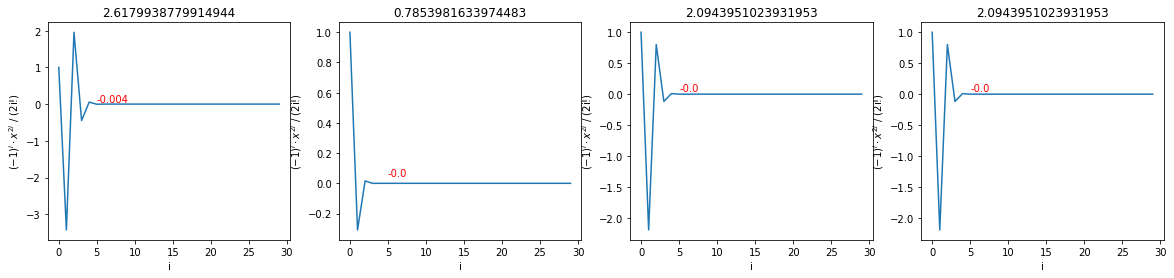

In [75]:
def terms_cos(x, i):
    return (-1)**i*x**(2*i)/math.factorial(2*i)

plot_term([np.pi/1.2, np.pi/4, np.pi/1.5, 2*np.pi/3], terms_cos, "$(-1)^i\cdot x^{2i}$ / (2i!)")

The values are oscillating between positive and negative that's because of $-1 ^ i$. The values in red are the $5^{th}$ term rounded off till the third decimal they are not necessarily zero.
<p>I'll be using the same terminating condition I was using for exponential function. I will stop the loop once the value of the series stops changing.

In [76]:
def cos(x) :
    t1 = 1
    t2 = 0
    cosx = 1
    sign = -1
    i = 1
    term = 1
    while t1 != t2:
        term = (sign**i)*(x**(2*i))/math.factorial(2*i)
        cosx += term
        i += 1
        t2 = t1
        t1 = cosx
#         if t1 == cosx :
#             break
#         t1 = cosx
    return cosx,i

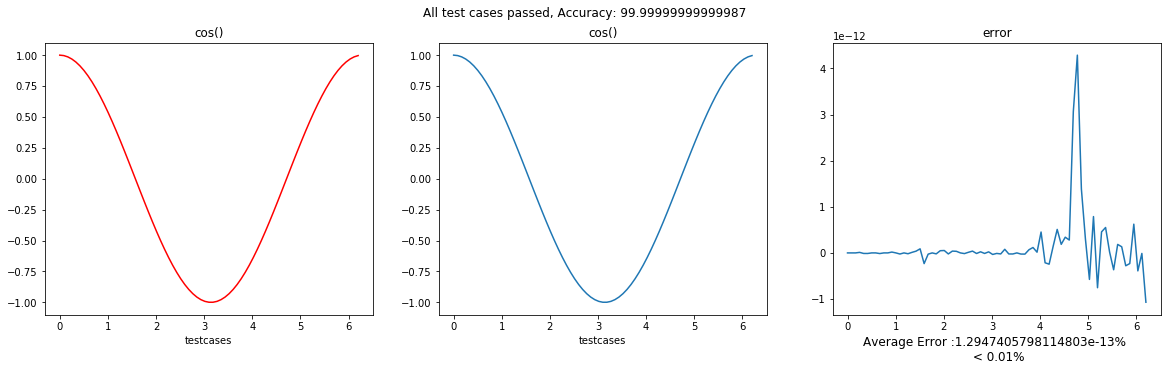

In [109]:
theSeenAndTheUnseenTest(cos, math.cos, np.linspace(0, 2*np.pi, num = 75, endpoint = False))

Instead of finding $(-1)^n$ I could just do i = i + 2 and alternate the sign to find the cos value. 

In [110]:
def cosine_naive(x):
    cosx = 1
    t1 = 1
    t2 = 0
    sign = -1
    i = 2
    term = 1
    while t1 != t2:
        cosx = cosx + (sign*(x**i))/math.factorial(i)
        sign = -sign
        i = i + 2
        t2 = t1
        t1 = cosx
#         if t1 == cosx :
#             break
#         t1 = cosx
    return cosx, i /2

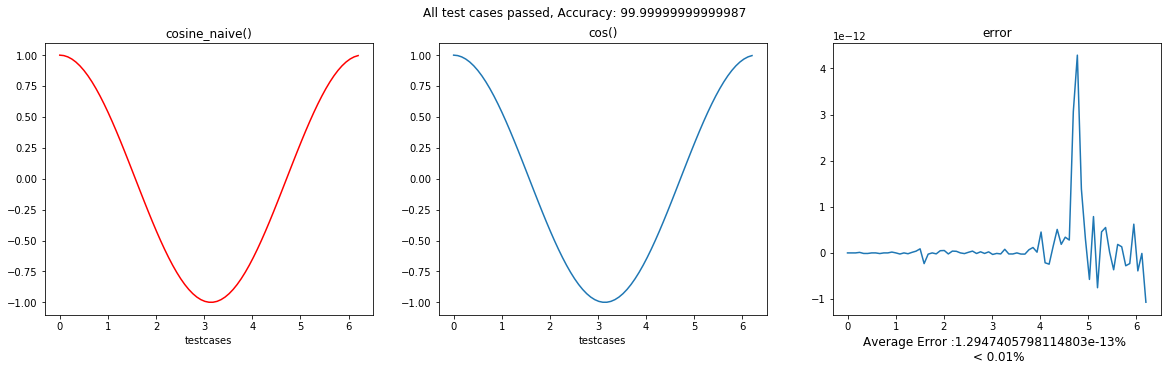

In [111]:
theSeenAndTheUnseenTest(cosine_naive, math.cos, np.linspace(0, 2*np.pi, num = 75, endpoint = False))

Similarly naive implementation for finding $\sin x$


$$\sin x = \sum_{k=0}^{\infty} \frac{(-1)^n}{(2n + 1)!}x^{(2n+1)} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$$

In [112]:
def sin(x):
    sine = 0
    i = 1
    t1 = 1
    t2 = 0
    sign = -1
    while t1 != t2:
        sign = -sign
        sine = sine + sign*(x**i)/math.factorial(i)
        i += 2
        t2 = t1
        t1 = sine
    return sine, int(i/2)

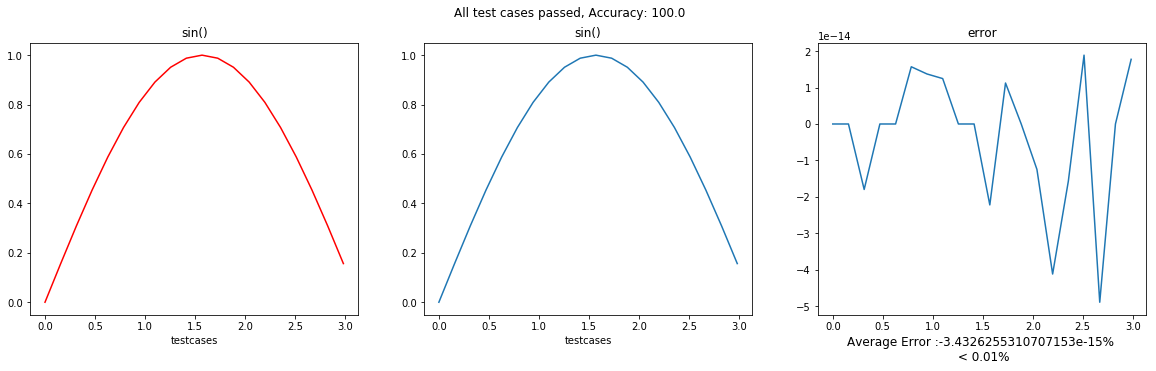

In [116]:
theSeenAndTheUnseenTest(sin, math.sin, np.linspace(0, math.pi, num = 20, endpoint = False))

________________________

The sine and cosine functions are basically the same, the sine function consists of all the odd powered terms and cosine consists of all the even powered terms. Sine and Cosine can be calculated using one function alone.
### Here is a function that calculates both sine and cosine 
Using the indicator i = 0 for cosine and i = 1 for sine

In [115]:
# i = 0 == cos
# i = 1 == sin
def cal_sine_cosine(x,i) :
    t1 = val = 0
    sign = -1
    while True:
        sign  = -sign
        val = val + ((x**(i))/math.factorial(i))*sign
        i = i + 2
        if t1 == val :
            break
        t1 = val
    return val, i/2

In [83]:
def find_cos(x) :
    return cal_sine_cosine(x,0)
    
def find_sin(x) :
    return cal_sine_cosine(x,1)

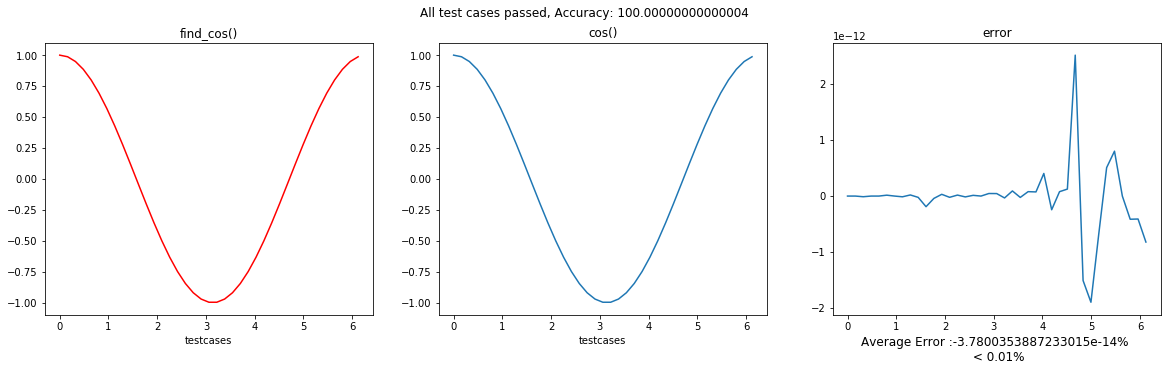

In [84]:
theSeenAndTheUnseenTest(find_cos, math.cos, np.linspace(0, 2*math.pi, num = 39, endpoint = False))

In [118]:
find_sin(np.pi*2)

(8.963042579559524e-15, 0)

In [122]:
a = np.linspace(0, 2*math.pi, num = 39, endpoint = False)
for i in a:
    math.sin(i)

In [ ]:
#sting Function
def test2(func1, func2, testcase) :
    
    ourvalues = []
    actualvalues = []
    error = []
    failed= []
    
    # This loop stores the output of the defined function,
    # output of inbuilt function in lists, and calculates
    # error
    for i in testcase :
        o = 0
        a = 0
        e = 0
        o = (func1(i)[0])
        a = (func2(i))
        ourvalues.append(o)
        actualvalues.append(a)
        if a != 0:            #avoiding division by zero
            e = ((a-o)/a)*100
            error.append(e)   # error
        else:
            error.append(0)
        if e > 0.01 :
            failed.append(i);
            
    fig, ax = plt.subplots(1,3,figsize=(20,5))

    # 1st subplot - plots values of defined function
    ax[0].plot(testcase, ourvalues, color = 'red')
    ax[0].set_title(func1.__name__ + "()")
    ax[0].set_xlabel("testcases")

    # 2nd subplot - plots values of inbuilt function
    ax[1].plot(testcase, actualvalues)
    ax[1].set_title(func2.__name__+"()")
    ax[1].set_xlabel("testcases")

    # 3rd subplot - plots the error
    ax[2].plot(testcase, error)
    ax[2].set_title("error")
    avg_error = sum(error)/len(error)

    # Title when all testcases are passed
    if(avg_error < 0.01) :
        fig.suptitle("All test cases passed, Accuracy: "+str(100-avg_error), fontsize = 12)
        ax[2].text(0.5, -0.17, "Average Error :" + str(avg_error)+ "% \n < 0.01%",
                   size=12, ha="center", transform=ax[2].transAxes)
    
    # Title when not all testcases are passed
    else :
        fig.suptitle("Accuracy: "+str(100-avg_error), fontsize = 12)
        ax[2].text(0.5, -0.17, "Average Error :" + str(avg_error)+ "% \n > 0.01%",
                   size=12, ha="center", transform=ax[2].transAxes)
        print(failed)

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


[]


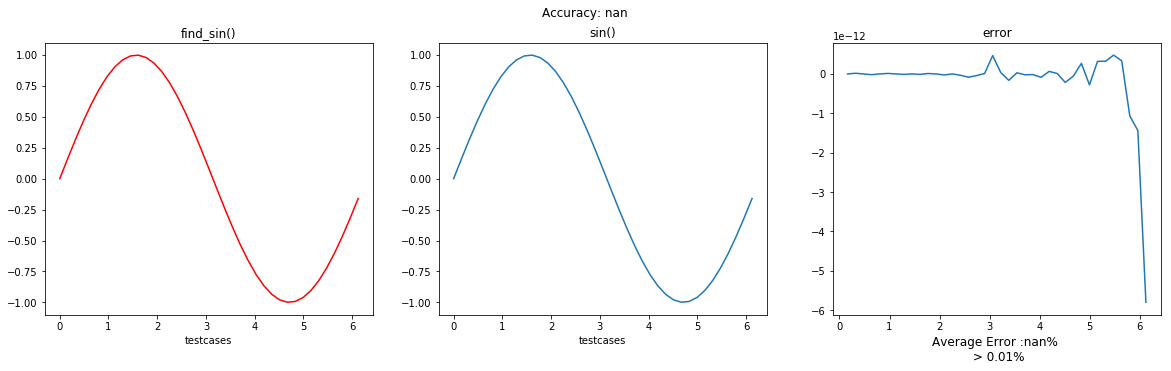

In [85]:
theSeenAndTheUnseenTest(find_sin, math.sin, np.linspace(0, 2*math.pi, num = 39, endpoint = False))

Let's take a look at the performance of this function.

In [86]:
cosnaive_time = find_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), find_cos)
sinnaive_time = find_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), find_sin)

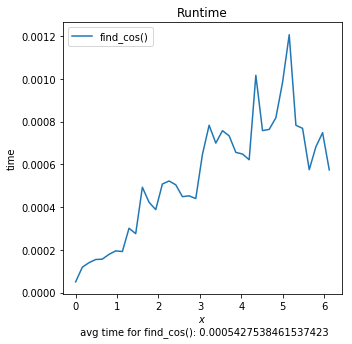

In [87]:
plot_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos))

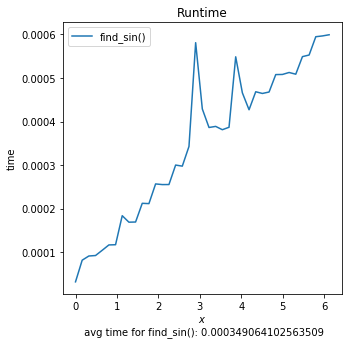

In [88]:
plot_time(np.linspace(0, 2*math.pi, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin))

| Optimization | Geometric Series   | Speed Up | Exponential | Speed up| Cosine| Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - | $2.8ms$| - | $3.24ms$| - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$| |||
| Power Calculation | $235 \mu s$ | $60\times$| $2.3 ms$| $0.5\times$||||
| Factorial Calculation | - | - | $1.5 ms$| $0.8 \times$||||
|All optimizations - 1| $117 \mu s$|$85 \times$|$3.31 ms$| $5\times$| ||| 
|All optimizations - 2 | - | - | $205 \mu s$| $7\times$||||

____________
## 2. Power Optimization 

In [89]:
def cal_sine_cosine_power(x,i) :
    t2 = t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    
    #initialising to the first according to sine or cos
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
    if i == 1:
        t2 = term = val = x
        i = 3
    
    while t1 != t2:
        term = term*sq
        sign  = -sign
        val = val + (term/math.factorial(i))*sign
        i = i + 2
        t2 = t1
        t1 = val
    return val, int(i/2)

def find_cos_power(x) : 
    return cal_sine_cosine_power(x,0)
def find_sin_power(x) :
    return cal_sine_cosine_power(x,1)

Let's test the optimized function

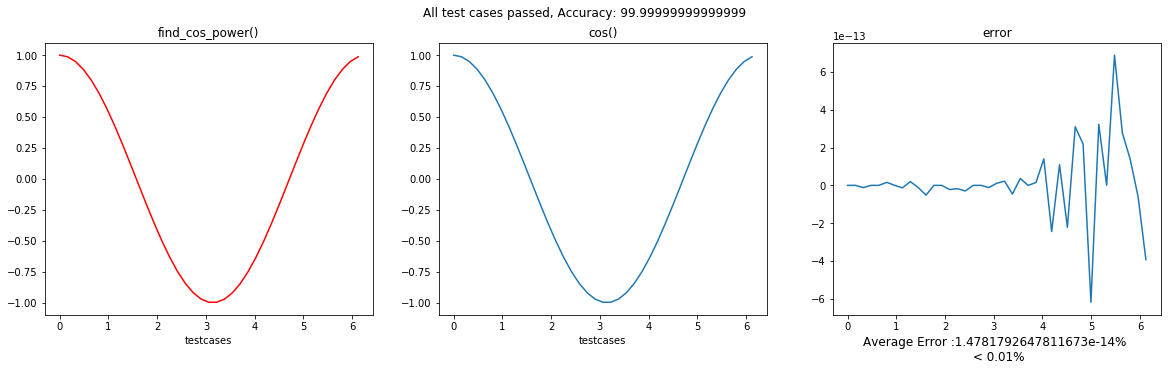

In [90]:
theSeenAndTheUnseenTest(find_cos_power, math.cos, np.linspace(0, np.pi*2, 39, False))

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


[]


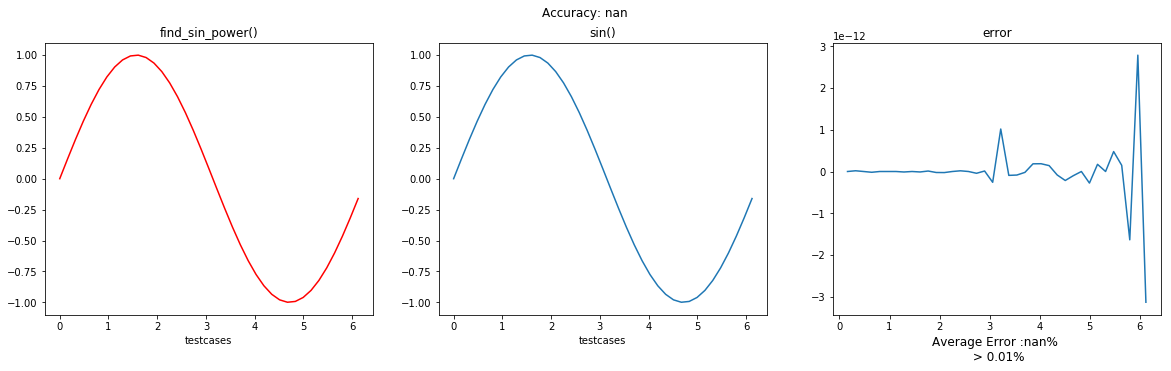

In [91]:
theSeenAndTheUnseenTest( find_sin_power, math.sin, np.linspace(0, np.pi*2, 39, False))

In [92]:
cospower_time = find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_cos_power)
sinpower_time = find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_sin_power)

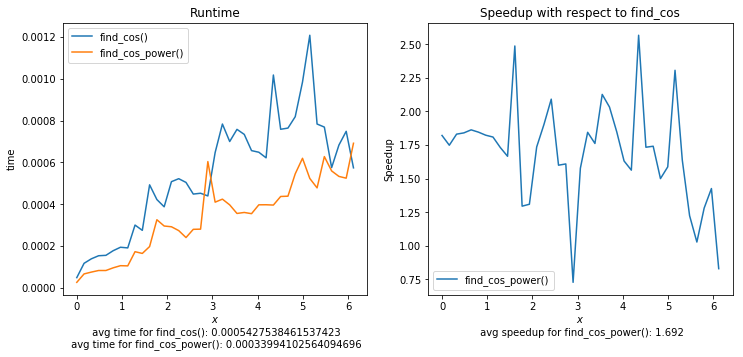

In [93]:
plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos),
          second = (cospower_time, find_cos_power)
         )

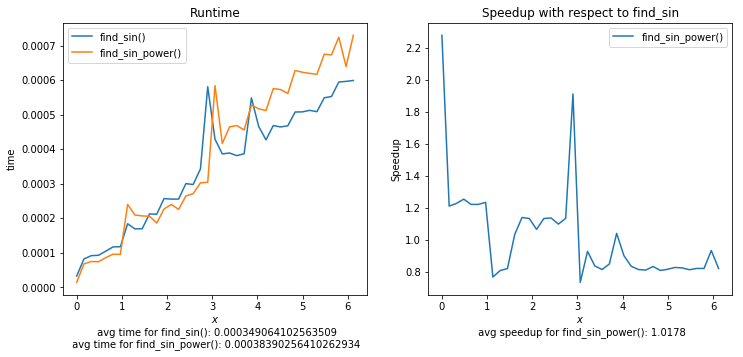

In [94]:
plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin),
          second = (sinpower_time, find_sin_power))

| Optimization | Geometric Series   | Speed Up | Exponential | Speed up| Cosine| Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - | $2.8ms$| - | $3.24ms$| - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$|$268ms$ | $1.06\times$|$355ms$|$1.03\times$|
| Power Calculation | $235 \mu s$ | $60\times$| $2.3 ms$| $0.5\times$|$0.333ms$|$1.6\times$|$0.38ms$|$1.0\times$|
| Factorial Calculation | - | - | $1.5 ms$| $0.8 \times$||||
|All optimizations - 1| $117 \mu s$|$85 \times$|$3.31 ms$| $5\times$| ||| 
|All optimizations - 2 | - | - | $205 \mu s$| $7\times$||||

______________________
## 3. Factorial Optimization

In [95]:
def cal_sine_cosine_factorial(x,i) :
    t2 = t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    
    #initialising to the first according to sine or cos
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
    if i == 1:
        t2 = term = val = x
        i = 3
    
    while t1 != t2:
        term = term*sq
        sign  = -sign
        val = val + (term/math.factorial(i))*sign
        i = i + 2
        t2 = t1
        t1 = val
    return val,int(i/2)

def find_cos_factorial(x) : 
    return cal_sine_cosine_factorial(x,0)
def find_sin_factorial(x) :
    return cal_sine_cosine_factorial(x,1)

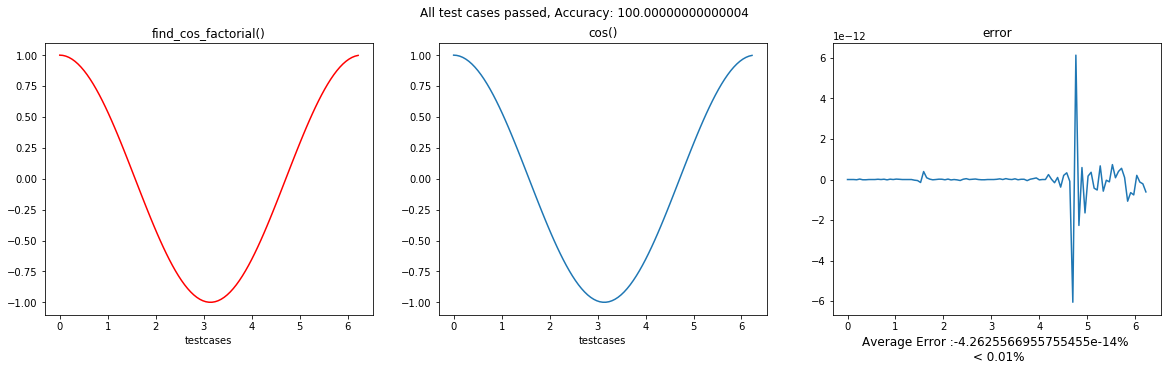

In [124]:
theSeenAndTheUnseenTest( find_cos_factorial, math.cos, np.linspace(0, np.pi*2, 99, False))

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


[]


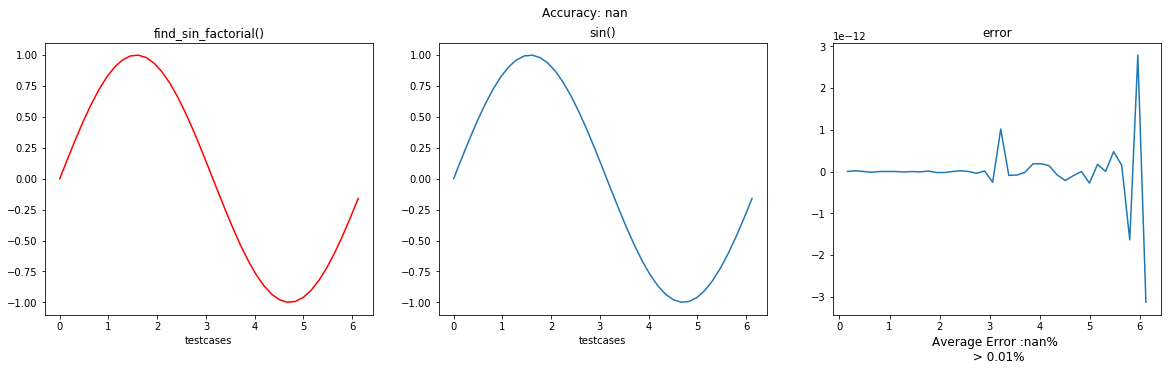

In [97]:
theSeenAndTheUnseenTest( find_sin_factorial, math.sin, np.linspace(0, np.pi*2, 39, False))

In [98]:
cosfactorial_time = find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_cos_factorial)
sinfactorial_time = find_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), find_sin_factorial)

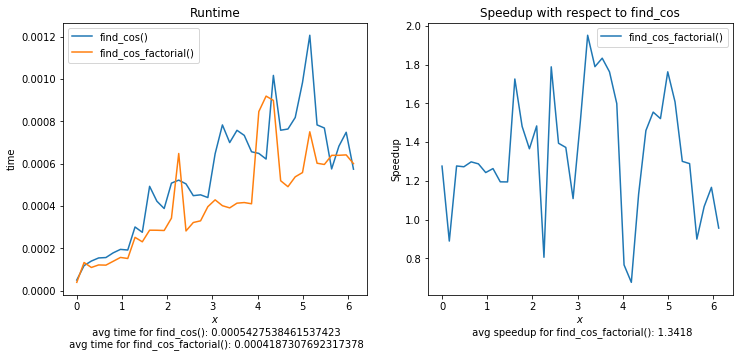

In [101]:
plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (cosnaive_time, find_cos),
          second = (cosfactorial_time, find_cos_factorial))

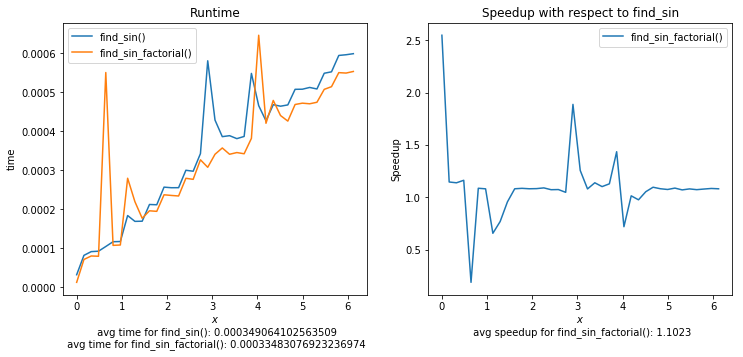

In [100]:
plot_time(np.linspace(0, np.pi*2, num = 39, endpoint = False), True, first = (sinnaive_time, find_sin),
          second = (sinfactorial_time, find_sin_factorial))

| Optimization | Geometric Series   | Speed Up| Exponential | Speed up| Cosine| Speedup | Sine | Speedup|
|------|------|------|------|------|------|------|------|------|
|   Naive  |$15.1 ms$| - | $1.44ms$ | - | $2.8ms$| - | $3.24ms$| - |
| Iterations | $149\mu s$ | $139\times$| $0.609 ms$| $2 \times$|$268ms$ | $1.06\times$|$355ms$|$1.03\times$|
| Power Calculation | $235 \mu s$ | $60\times$| $2.3 ms$| $0.5\times$|$3.33ms$|$1.6\times$|$3.8ms$|$1.0\times$|
| Factorial Calculation | - | - | $1.5 ms$| $0.8 \times$|$0.41ms$|$1.3\times$|$0.33ms$|$1.1\times$
|All optimizations - 1| $117 \mu s$|$85 \times$|$3.31 ms$| $5\times$| ||| 
|All optimizations - 2 | - | - | $205 \mu s$| $7\times$||||

______
## 4. All optimizations together

In [105]:
def cal_sine_cosine_allopts1(x,i) :
    t2 = t1 = val = 0
    sign = 1
    fact = 1
    sq = x*x
    n = 0
    
    #initialising to the first according to sine or cos
    if i == 0:
        i = 2
        val = 1
        t1 = term = 1
    if i == 1:
        t2 = term = val = x
        i = 3
    
    while t1 != t2:
        term = term*sq
        fact = fact*i*(i-1)
        sign  = -sign
        val = val + (term/fact)*sign
        i = i + 2
        t2 = t1
        t1 = val
    return val, int(n/2)

def find_cos_allopts1(x) : 
    return cal_sine_cosine_allopts1(x,0)
def find_sin_allopts1(x) :
    return cal_sine_cosine_allopts1(x,1)

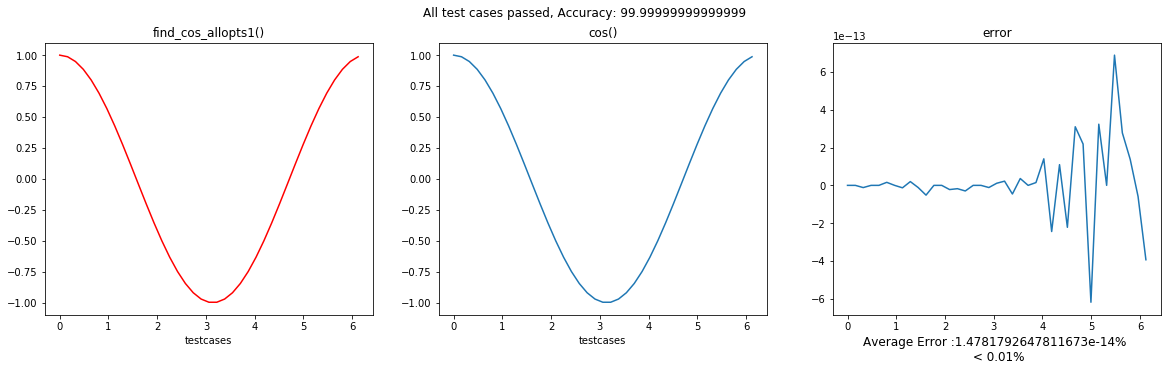

In [106]:
theSeenAndTheUnseenTest( find_cos_allopts1, math.cos, np.linspace(0, np.pi*2, 39, False))

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


[]


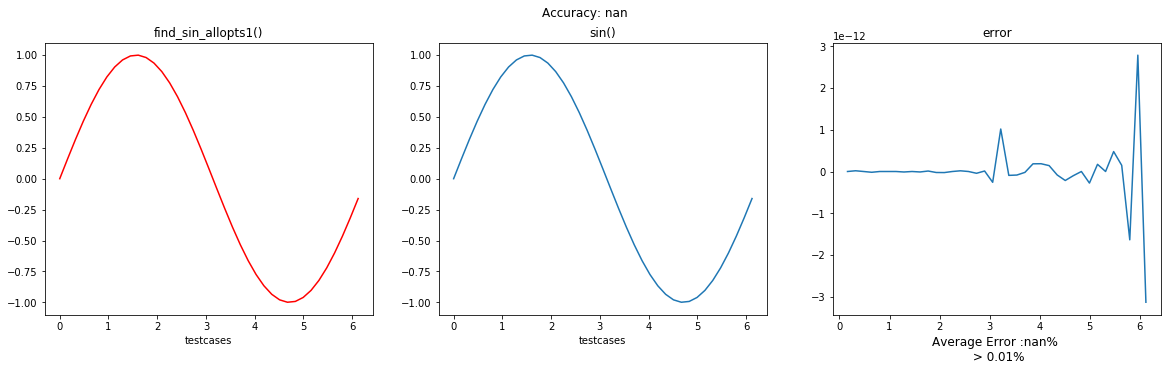

In [107]:
theSeenAndTheUnseenTest( find_sin_allopts1, math.sin, np.linspace(0, np.pi*2, 39, False))

#### Setting a precision limit to reduce no.of iterations

In [ ]:
%%timeit
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    t1 = 1
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    while abs(t1) >= 1e-5:
        term = term*sq
        fact = fact*i*(i-1)*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
        
    return val

cal_sine_cosine2(np.pi/6,1)

#### There is significant reduction in the computation time from 12.5 µs ± 103 ns per loop to 3$\mu s$

In [ ]:
def cal_sine_cosine2(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = 1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        term = term*sq
        fact = fact*(i*(i-1))*(-1)
        t1 = (term/fact)
        val = val + t1
        i = i + 2
    return val, n

def find_cos(x) :
    return cal_sine_cosine2(x,0)

def find_sin(x) :
    return cal_sine_cosine2(x,1)

In [ ]:
test(find_cos,math.cos,testcase_trig)

In [ ]:
test(find_sin,math.sin,testcase_trig)


<br> We will now replace $\frac{a.a.a...}{1.2.3...}$ by 
<br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})*\frac{k}{i+1}*\frac{k}{i+2}$<br><br>$(\frac{k}{i}*\frac{k}{i+1}*\frac{k}{i+2})*\frac{k}{i+3}*\frac{k}{i+4}$<br><br>$\dots$<br>

In [ ]:
%%timeit
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
    return val

cal_sine_cosine3(np.pi/6,1)

In [ ]:
def cal_sine_cosine3(x,i) :
    fact = 1
    sq = x*x
    n = 0
    if i == 0:
        i = 2
        val = 1
        term = 1
    if i == 1:
        term = val = x
        i = 3
    t1 = val
    con_val = []
    while abs(t1) > 1e-5:
        t1 = t1*sq/(i*(i-1))*(-1)
        val = val + t1
        i = i + 2
        n = n + 1
        con_val.append(val)
    return val, n, con_val

def find_cos(x) :
    return cal_sine_cosine3(x,0)
def find_sin(x) :
    return cal_sine_cosine3(x,1)

In [ ]:
test(find_cos,math.cos,testcase_trig)

In [ ]:
test(find_sin,math.sin,testcase_trig)

In [ ]:
x = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
cosx = []
actualcosx = []
cosx_itr = []
sinx = []
actualsinx = []
sinx_itr = []
for i in x :
    tup = cal_sine_cosine3(i,0)
    cosx.append(tup[0])
    cosx_itr.append(tup[1])
    actualcosx.append(math.cos(i))
    tup = cal_sine_cosine3(i,1)
    sinx.append(tup[0])
    sinx_itr.append(tup[1])
    actualsinx.append(math.sin(i))  

We calculated cos(x), sin(x), math.cos(x), math.sin(x), the number of iterations required to calculate each of these values by function cal_sine_cosine(x,i). Lets take a look at visual representation of these values

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,10)) 
ax[0][0].plot(cosx, color ='red')
ax[0][0].plot(actualcosx)
ax[0][0].set_title("cos(x)")
ax[0][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
ax[0][1].plot(sinx, color = 'red')
ax[0][1].plot(actualsinx)
ax[0][1].set_title("sin(x)")
ax[0][1].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
ax[1][0].plot(cosx_itr)
ax[1][1].plot(sinx_itr);

We can see that as the angles approaches 2pi the number of iterations increase. 
<br>Let us consider one of the lasts terms in our list of angles. At each iteration we will store the value of sum that is the value of cos(x) / sin(x) and plot it, then check these values for errors. 

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
tup = cal_sine_cosine3(x[97],0)
ax.plot(tup[2])
ans = math.cos(x[97])
error = []
for i in tup[2] : 
    error.append(ans - i)
ax.plot(error, color = 'red')
ax.legend(['cal_sine_cosine('+str(round(x[97],3))+',0)', 'error'])
ax.set_xlabel("No.of Iterations")
ax.set_ylabel("Value");

***

Till now we have seen 4 functions that calculate sine and cosine values. Using %%timeit we also found out the computation time required by these functions. 
<br>Now lets take a look at the number of iterations.

In [ ]:
itr = []
itr1 = []
itr2 = []
itr3 = []
for i in x :
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine1(i,0)[1])
    itr2.append(cal_sine_cosine2(i,0)[1])
    itr3.append(cal_sine_cosine3(i,0)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr,color = 'red')
ax[0].plot(itr1, color = 'blue')
ax[0].plot(itr2,color = 'yellow')
ax[0].plot(itr3, color  = 'green')
ax[0].legend(['cal_sine_cosine(x)','cal_sine_cosine1(x)','cal_sine_cosine2(x)','cal_sine_cosine3(x)'])
ax[0].set_ylabel("Iterations")

itr4 = []
itr4.append(cal_sine_cosine(0,0)[1])
itr4.append(cal_sine_cosine1(0,0)[1])
itr4.append(cal_sine_cosine2(0,0)[1])
itr4.append(cal_sine_cosine3(0,0)[1])
xaxis = ["cal_sine_cosine(0,0)","cal_sine_cosine1(0,0)","cal_sine_cosine2(0,0)","cal_sine_cosine3(0,0)"]
ax[1].plot(xaxis,itr4)
ax[1].set_title("No.of Iterations when x  = 0")
ax[1].set_xlabel("cal_sine_cosine(x) functions [Naive --> Optimized]")
ax[1].set_ylabel("Iterations");

The number of iterations have decreased with increased optimization. 
<br>The last two functions have the same no.of iterations that is why you can't see yellow - they overlap
<br>In the second graph at the right, we can see the number of iterations taken by each function to find cos(0)
<br>What if we set a precision limit to our very first naive implementation of calculating sine and cosine, how will the graph for number of iterations look?

In [ ]:
def cal_sine_cosine4(x,i) :
    t1 = 1
    val = 0
    sign = -1
    n = 0
    while abs(t1) > 1e-5:
        n = n + 1
        sign  = -sign
        t1 = ((x**(i))/math.factorial(i))*sign
        val = val + t1
        i = i + 2
    return val, n

In [ ]:
itr4 = []
itr41 = []
itr = []
itr1 = []
angle = np.linspace(0, 2* np.pi  ,num = 101 , endpoint=True)
for i in angle :
    itr4.append(cal_sine_cosine4(i,0)[1])
    itr41.append(cal_sine_cosine4(i,1)[1])
    itr.append(cal_sine_cosine(i,0)[1])
    itr1.append(cal_sine_cosine(i,1)[1])

fig, ax = plt.subplots(1,2, figsize = (15,7))
ax[0].plot(itr4)
ax[0].plot(itr, color = 'orange')
ax[0].set_ylabel("Iterations for finding cos")
ax[0].legend(['cal_sine_cosine4(x,0)','cal_sine_cosine(x,0)'])
ax[1].plot(itr41)
ax[1].plot(itr1, color = 'orange')
ax[1].set_ylabel("Iterations for finding sine")
ax[1].legend(['cal_sine_cosine4(x,1)','cal_sine_cosine(x,1)']);

The number of iterations are quite lower than the first naive implementation. The computation time required can significantly be reduced by just keeping a proper terminating condition, further optimization can be done to get an even smaller computation time.

***

### Summary 

I started off with the <b>geometric progression</b>, in which I did two cases of optimization :
    - Limiting the no.of iterations.
        - I understood that I could the same accuracy for a lot lower no.of iterations, which would give me a speed up of $300\times$. I also saw the relation between speedup, accuracy, and precision.
    - Replacing the power function.
        - There was a significant reduction in the computation time, as I was not calculating the term at every iteration, instead using the previously calculated term.

In <b>exponential function</b> :
    - Used the previous 2 optimization techniques.
    - Optimized the factorial.
    - Found another case of optimization.
    - Put all of them together
    
In <b>trigonometric function</b> :
    - Used the 4 cases of optimization 
    - Put them togther
    - explored the no.of iterations, error in the values

__________________


In [ ]:
# angle = np.linspace(0, 2* np.pi  ,num = 100 , endpoint=False)
# def testing2(func,i) :
#     if i == 0 :
#         cosx = []
#         actualcos = []
#         error = []
        
#         #finding cos and math.cos for every angle in the list
#         for i in angle :
#             cosofx = func(i,0)[0]
#             actualcosofx = math.cos(i)
#             cosx.append(cosofx)
#             actualcos.append(actualcosofx)
#             error.append(round((actualcosofx - cosofx),7))
            
#         #plotting graph for userdefines and math.cos
#         fig, ax = plt.subplots(2,2,figsize=(10,10))
#         ax[0][0].plot(cosx, color = 'red')
#         ax[0][0].set_title("cal_sine_cosine(x,0)")
#         ax[0][1].plot(actualcos)
#         ax[0][1].set_title("math.cos(x)")
#         ax[1][0].plot(cosx, color = 'red')
#         ax[1][0].plot(actualcos)
#         ax[1][0].legend(['cal_sine_cosine(x,0)', 'math.cos(x)'])
#         ax[1][0].set_title("Superimposition of cal_sine_cosine(x,0) and math.cos(x)")
#         ax[1][1].plot(error)
#         ax[1][1].set_title("error")
        
#     if i == 1 :
#         sinx = []
#         actualsin = []
#         error = []
        
#         #finding sin and math.sin for all values in list - angle
#         for i in angle :
#             sinofx = func(i,1)[0]
#             actualsinofx = math.sin(i)
#             sinx.append(sinofx)
#             actualsin.append(actualsinofx)
#             error.append(round((actualsinofx - sinofx),7))
            
#         #plotting graph for user defined function and math.sin
#         fig, ax = plt.subplots(2,2,figsize=(10,10))
#         ax[0][0].plot(sinx, color = 'red')
#         ax[0][0].set_title("cal_sine_cosine(x,1)")
#         ax[0][1].plot(actualsin)
#         ax[0][1].set_title("math.sin(x)")
#         ax[1][0].plot(sinx, color = 'red')
#         ax[1][0].plot(actualsin)
#         ax[1][0].legend(['cal_sine_cosine(x,1)', 'math.sin(x)'])
#         ax[1][0].set_title("Superimposition of cal_sine_cosine(x,1) and math.sin(x)")
#         ax[1][1].plot(error)
#         ax[1][1].set_title("error")

In [ ]:
'''

#plot_computationTime(function, testcase):
#    Will plot a graph of Computation time vs. testcase

def plot_computationTime(func, testcase):
    time = []
    for i in testcase:
        t = timeit.Timer("func(i)", globals={"func": func, "i": i})
        time.append(t.timeit(number = 7))
        
    fig, ax = plt.subplots(1,1, figsize = (5,5))
    ax.plot(testcase,time);
'''

In [ ]:

time = []
for i in np.linspace(0.1, 1, 9, endpoint = False):
    x = %timeit -o gpsum_power(i)
    time.append(x)
print("_________________")

I didn't come up with $200\times$ improvement in one go. I first saw how my naive implementation was working for different inputs. Was the output correct? what is the time taken to generate the output? I visualized all of it. Visualizing the data helped me ask the right questions, why are the iterations increasing as the input is increasing? Even if they are increasing why is it so high ? Is there a way I could reduce them ? Then I thought of tolerance. With visualization I could understand the relation between tolerance, error and iterations and which helped me find the right value. This gave a speed up of $70\times$. Visualizing the iterations of both naive and optimized version I could clearly see the impact tolerance made on it. All these steps taken to get $70\times$ speedup with accuracy is unseen by the user.
<p>Later I thought of calculating different ways to find power. I could see that using a different library function I get a speed up of $1.1\times$ but the error remained the same for all the testcases. Then in the next function I calculated power using previous terms. This gave a speed up of $1.5\times$ with 99.99% accuracy. Notice that I had written a generic function for testing and eveery time I made a change I simply called it to check the error. 
<p>Tolerance and calculation individually gave a speed up of $70\times$ and $1.5\times$, but when I put the two together I get a speedup of $200\times$. The two have a sort of multiplicative effect on the speedup. 
<p>Now I have a product which is $200\times$ faster than the naive version giving me an accuracy of 99.99%. What the user sees is a product meeting its requirements giving the right output. He can't see role or importance of visualization, optimization and testing that helped in developing the end product. These unseen aspects help in improving the performace and quality of the product while developing it and determine the quality of the product after developing it. 